# House price prediction

## Load dataset

In [355]:
import pandas as pd
ds = pd.read_csv('melb_data.csv', delimiter=',')
ds.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


## Data Preprocessing

In [356]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [357]:
ds.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [358]:
ds=ds.dropna().reset_index(drop=True)
ds.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [359]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rooms                 2.000000
Price            705000.000000
Distance              6.500000
Postcode            103.000000
Bedroom2              1.000000
Bathroom              1.000000
Car                   1.000000
Landsize            476.000000
BuildingArea         79.000000
YearBuilt            60.000000
Lattitude             0.097237
Longtitude            0.126502
Propertycount      5791.250000
dtype: float64


/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/742210670.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = ds.quantile(0.25)
/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/742210670.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = ds.quantile(0.75)


In [360]:
#remove all extreme outliers
ds_out= ds[~((ds < (Q1 - 3 * IQR)) |(ds > (Q3 + 3 * IQR))).any(axis=1)]
ds_out.shape
print(ds_out)

            Suburb          Address  Rooms Type      Price Method  \
0       Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
1       Abbotsford     5 Charles St      3    h  1465000.0     SP   
2       Abbotsford      55a Park St      4    h  1600000.0     VB   
3       Abbotsford     124 Yarra St      3    h  1876000.0      S   
4       Abbotsford    98 Charles St      2    h  1636000.0      S   
...            ...              ...    ...  ...        ...    ...   
6190   Westmeadows    4 Pershore Ct      3    h   635000.0      S   
6192  Williamstown      75 Cecil St      3    h  1050000.0     VB   
6193  Williamstown    2/29 Dover Rd      1    u   385000.0     SP   
6194       Windsor  201/152 Peel St      2    u   560000.0     PI   
6195    Yarraville  54 Pentland Pde      6    h  2450000.0     VB   

            SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0            Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
1            Biggin  

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/2278075088.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ds_out= ds[~((ds < (Q1 - 3 * IQR)) |(ds > (Q3 + 3 * IQR))).any(axis=1)]


### Plots to better understand the data

[(1000.0, 2020.0)]

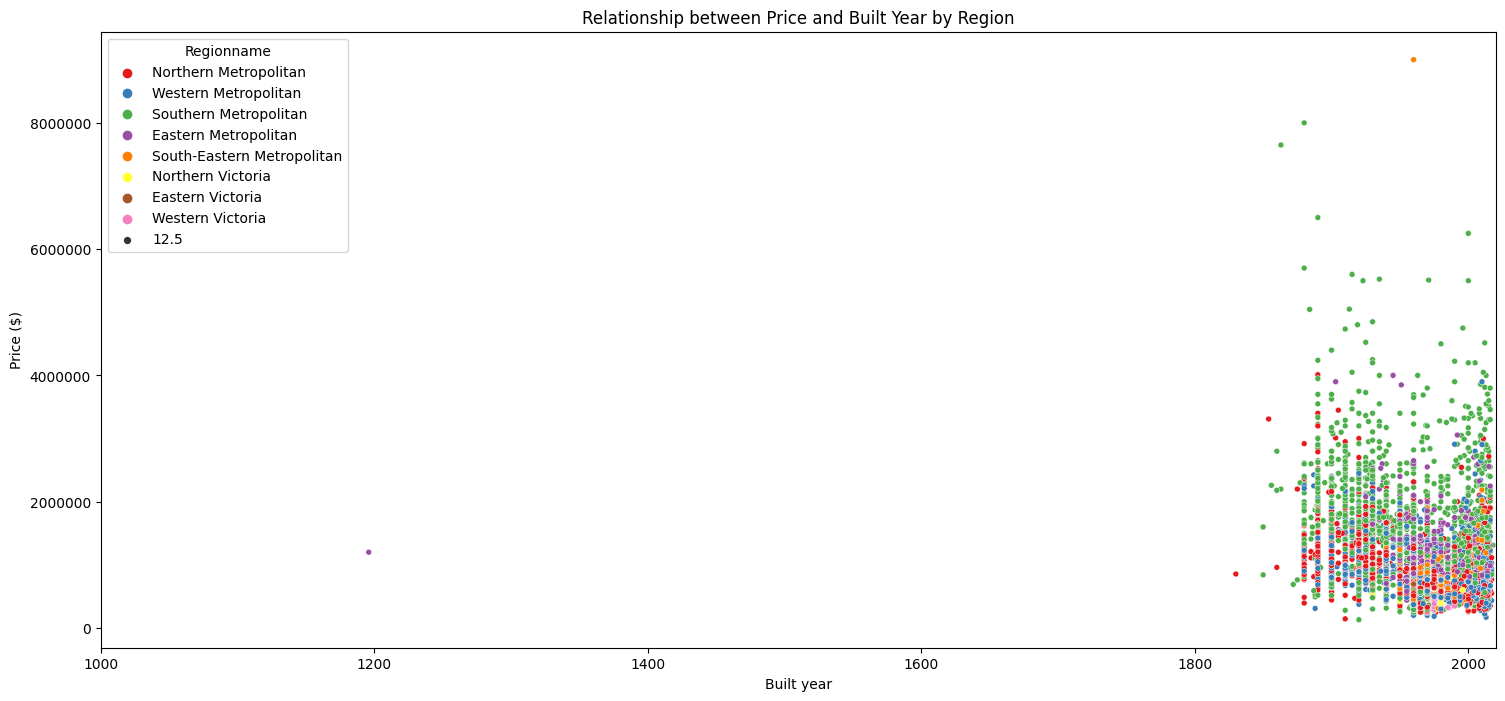

In [108]:
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="YearBuilt", y='Price', hue="Regionname", data=ds, palette="Set1", ax=ax1, size = 12.5)
ax1.set_title("Relationship between Price and Built Year by Region")
ax1.set(xlim=(1800,2020))
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set(ylabel='Price ($)', xlabel='Built year')
ax1.set(xlim=(1000,2020))

[Text(0, 0.5, 'Price ($)'), Text(0.5, 0, 'Built year')]

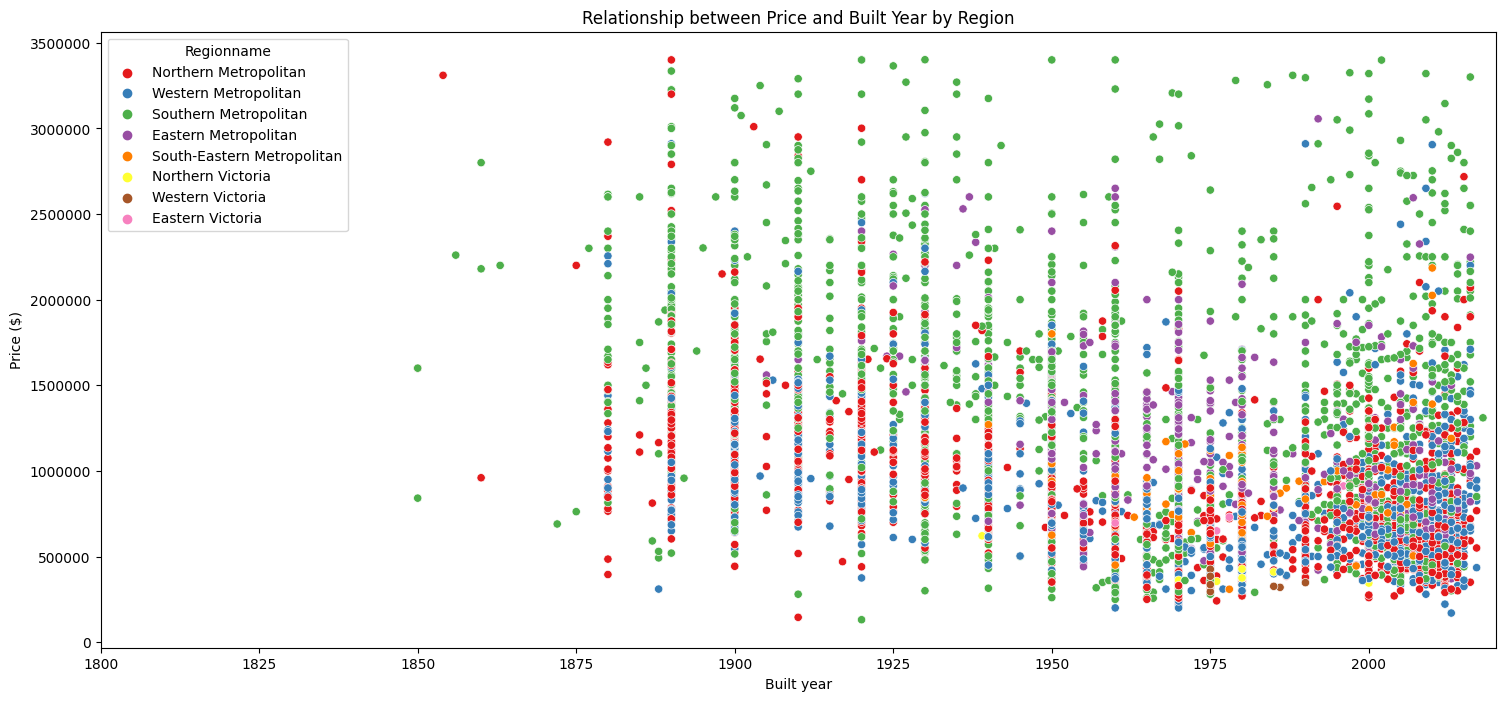

In [109]:
# Relationship between Price and Built Year by Region without outliers
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="YearBuilt", y='Price', hue="Regionname", data=ds_out, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Price and Built Year by Region")
ax1.set(xlim=(1800,2020))
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set(ylabel='Price ($)', xlabel='Built year')

[Text(0, 0.5, 'Price ($)'), Text(0.5, 0, 'Number of rooms')]

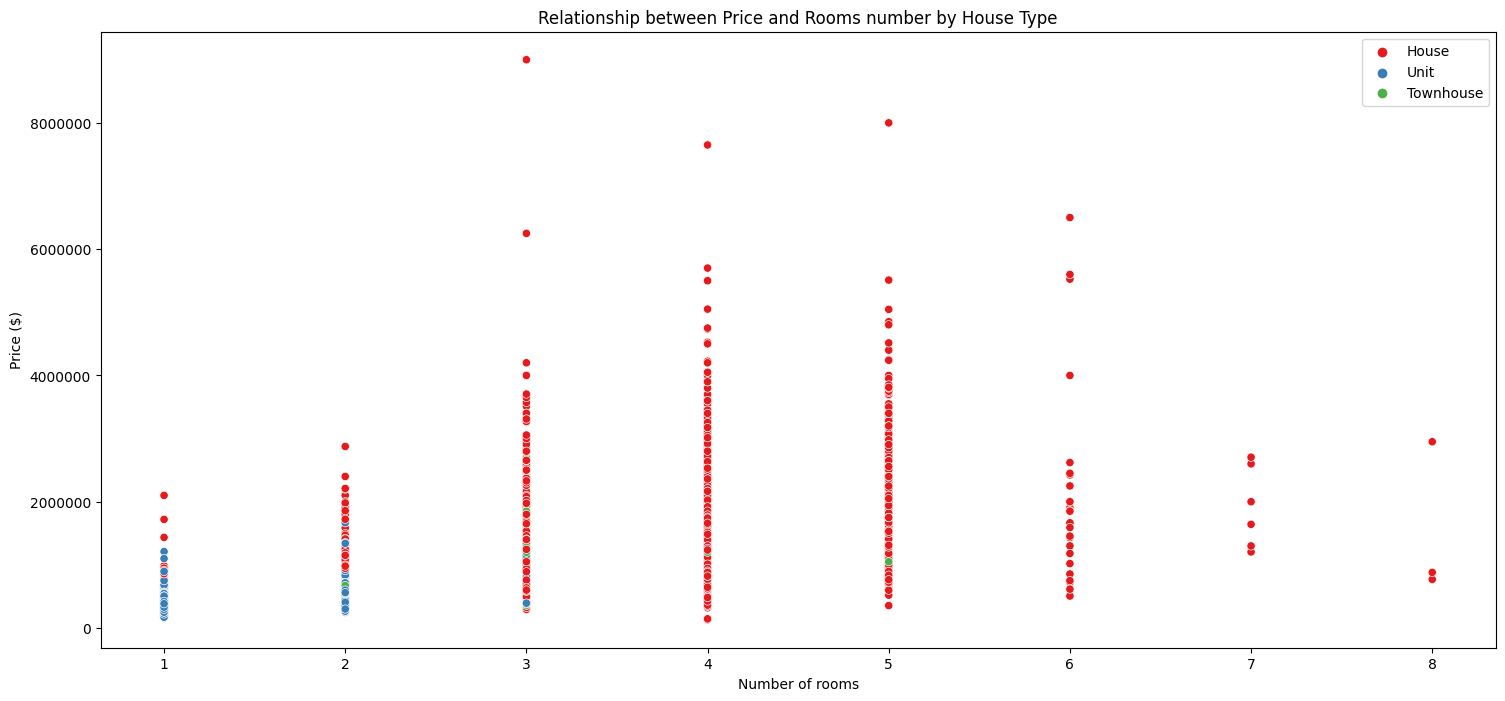

In [110]:
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="Rooms", y='Price', hue="Type", data=ds, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Price and Rooms number by House Type")
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['House','Unit','Townhouse'], bbox_to_anchor=(1,1))
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set(ylabel='Price ($)', xlabel='Number of rooms')

[Text(0, 0.5, 'Price ($)'), Text(0.5, 0, 'Number of rooms')]

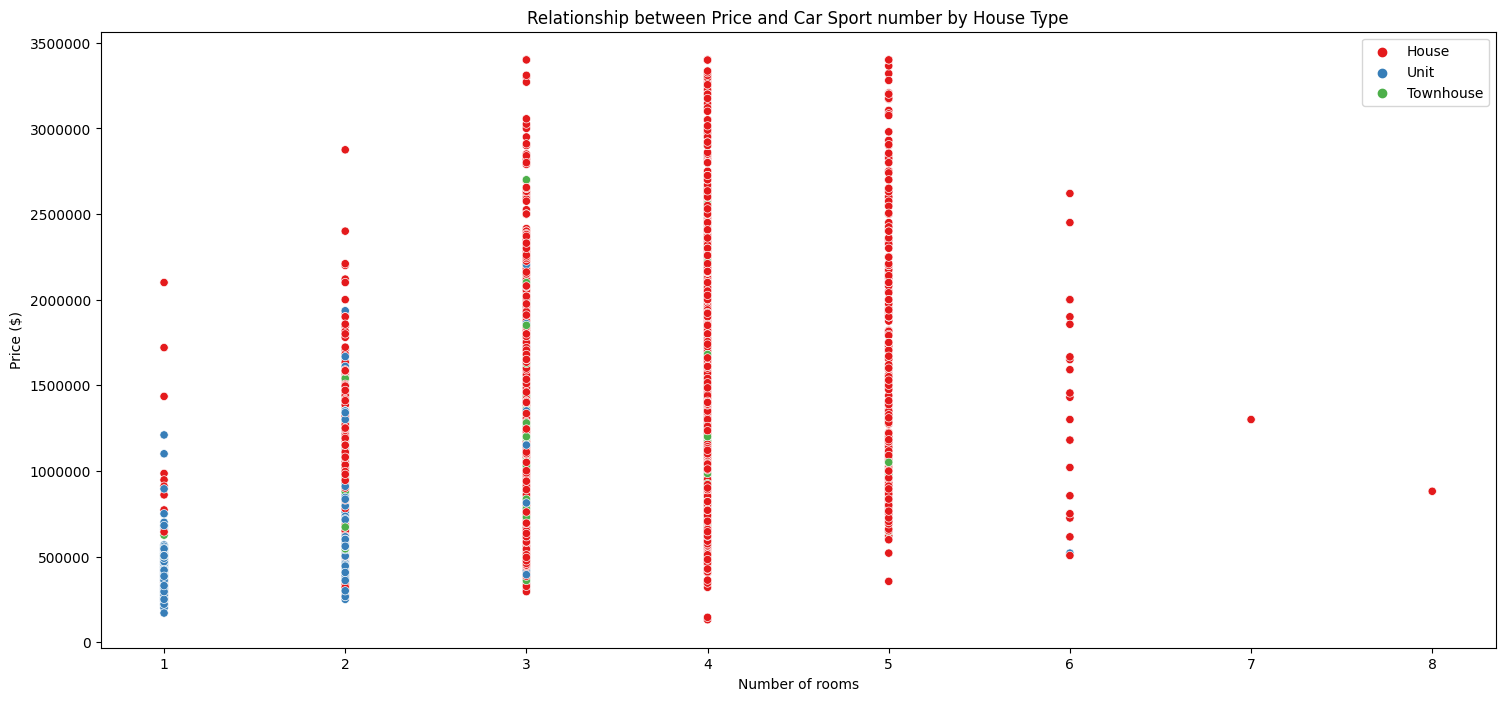

In [111]:
# Relationship between Price and Rooms number by House Type without outliers
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="Rooms", y='Price', hue="Type", data=ds_out, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Price and Car Sport number by House Type")
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['House','Unit','Townhouse'], bbox_to_anchor=(1,1))
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set(ylabel='Price ($)', xlabel='Number of rooms')

[Text(0, 0.5, 'Price ($)'), Text(0.5, 0, 'Landsize')]

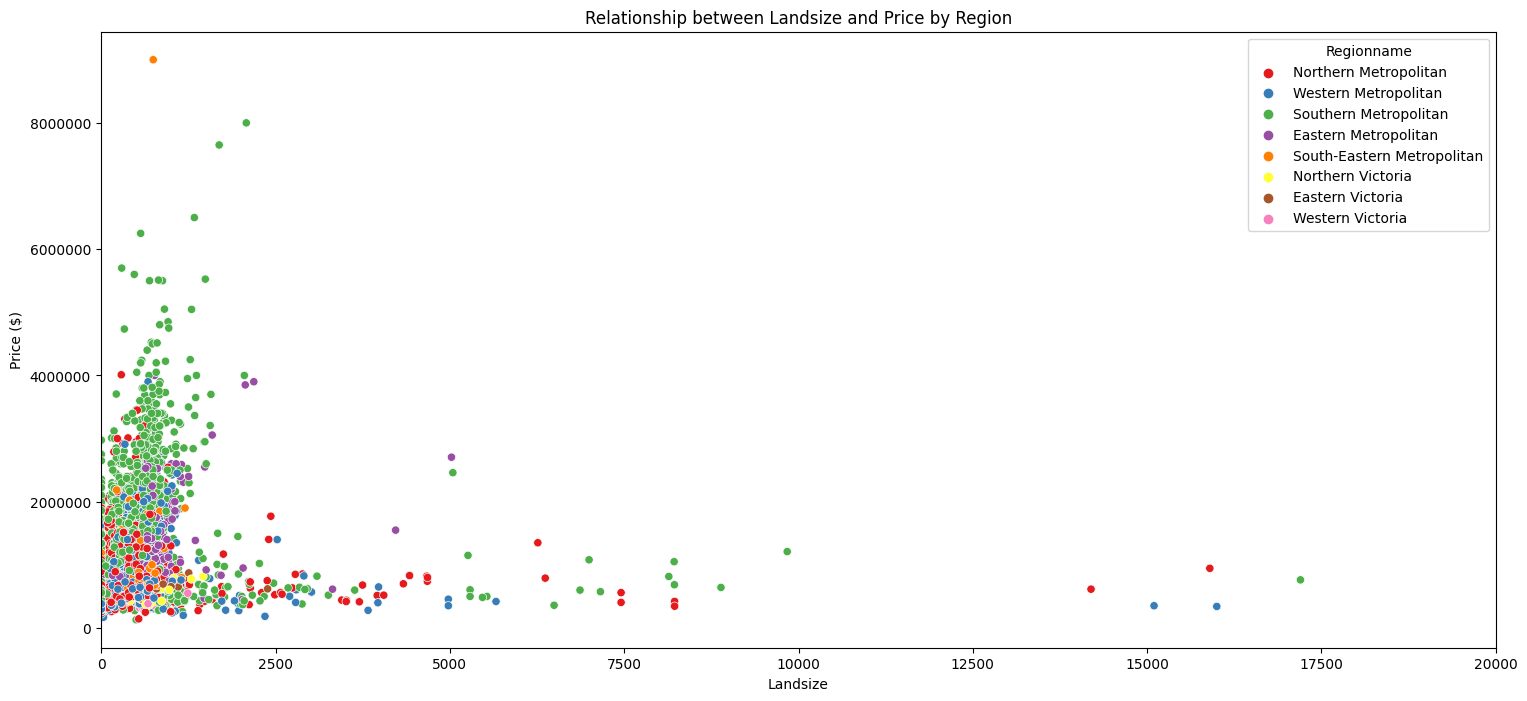

In [112]:
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="Landsize", y='Price', hue="Regionname", data=ds, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Landsize and Price by Region")
ax1.set(xlim=(-10,20000))
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set(ylabel='Price ($)', xlabel='Landsize')

[Text(0, 0.5, 'Price ($)'), Text(0.5, 0, 'Landsize')]

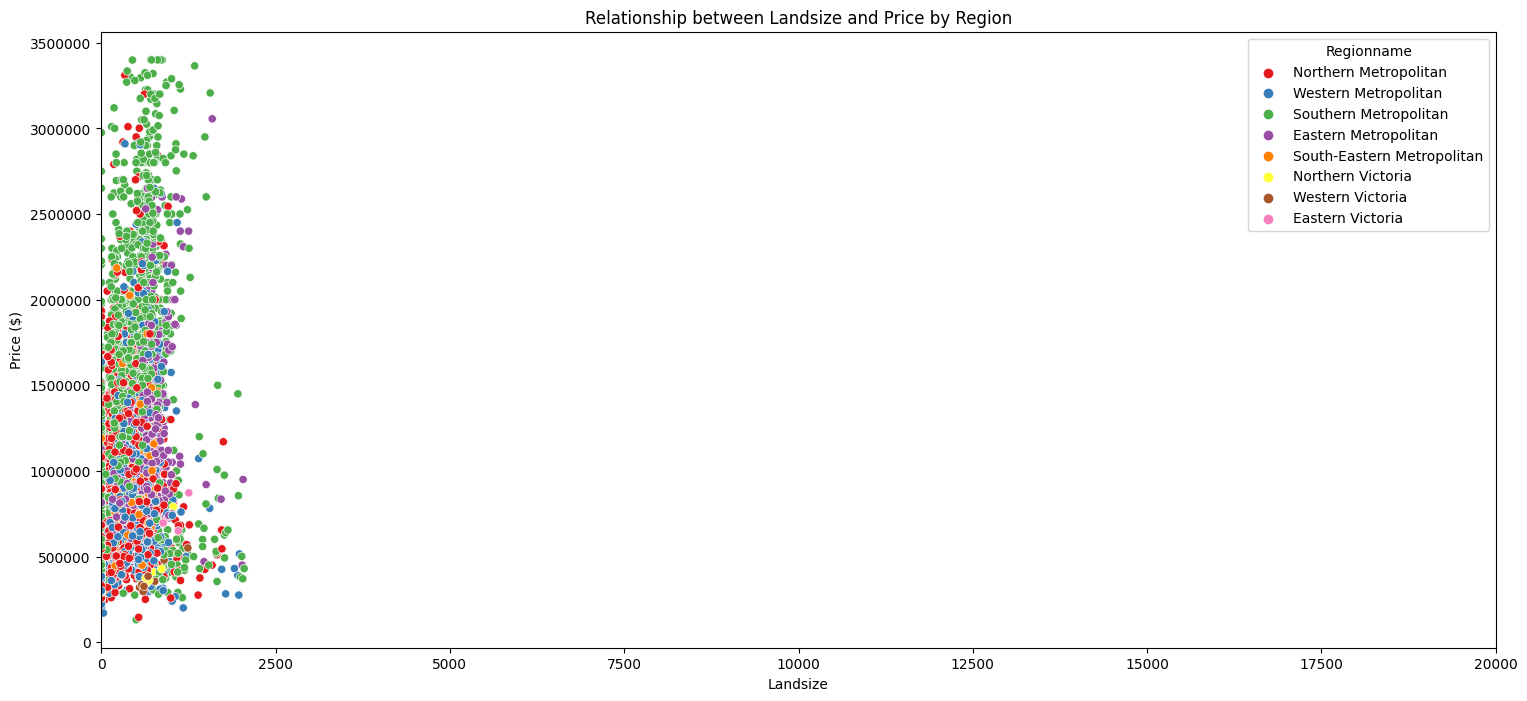

In [113]:
# Relationship between Landsize and Price by Region without outliers
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="Landsize", y='Price', hue="Regionname", data=ds_out, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Landsize and Price by Region")
ax1.set(xlim=(-10,20000))
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set(ylabel='Price ($)', xlabel='Landsize')

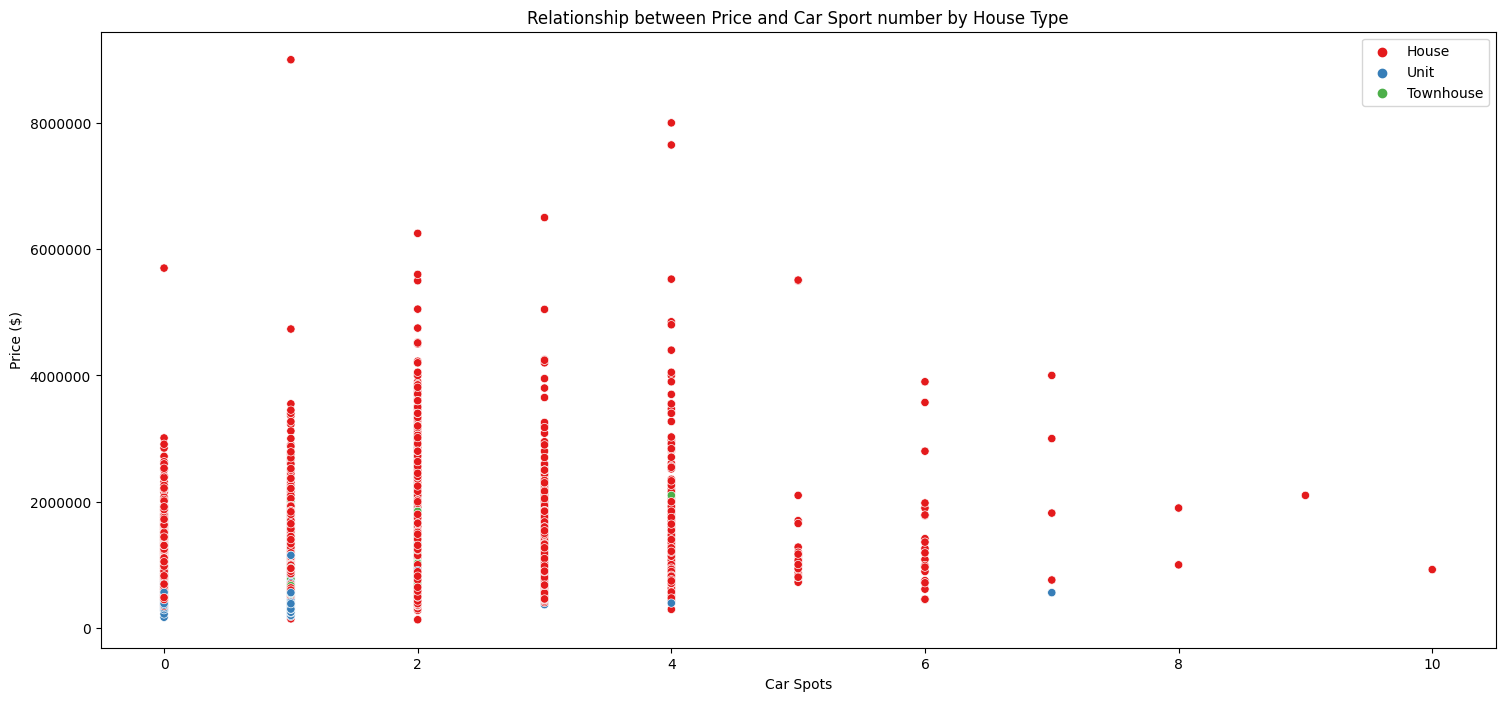

In [114]:
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="Car", y='Price', hue="Type", data=ds, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Price and Car Sport number by House Type")
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['House','Unit','Townhouse'], bbox_to_anchor=(1,1))
ax1.set(xlabel='Car Spots', ylabel='Price ($)')
ax1.ticklabel_format(useOffset=False, style='plain')

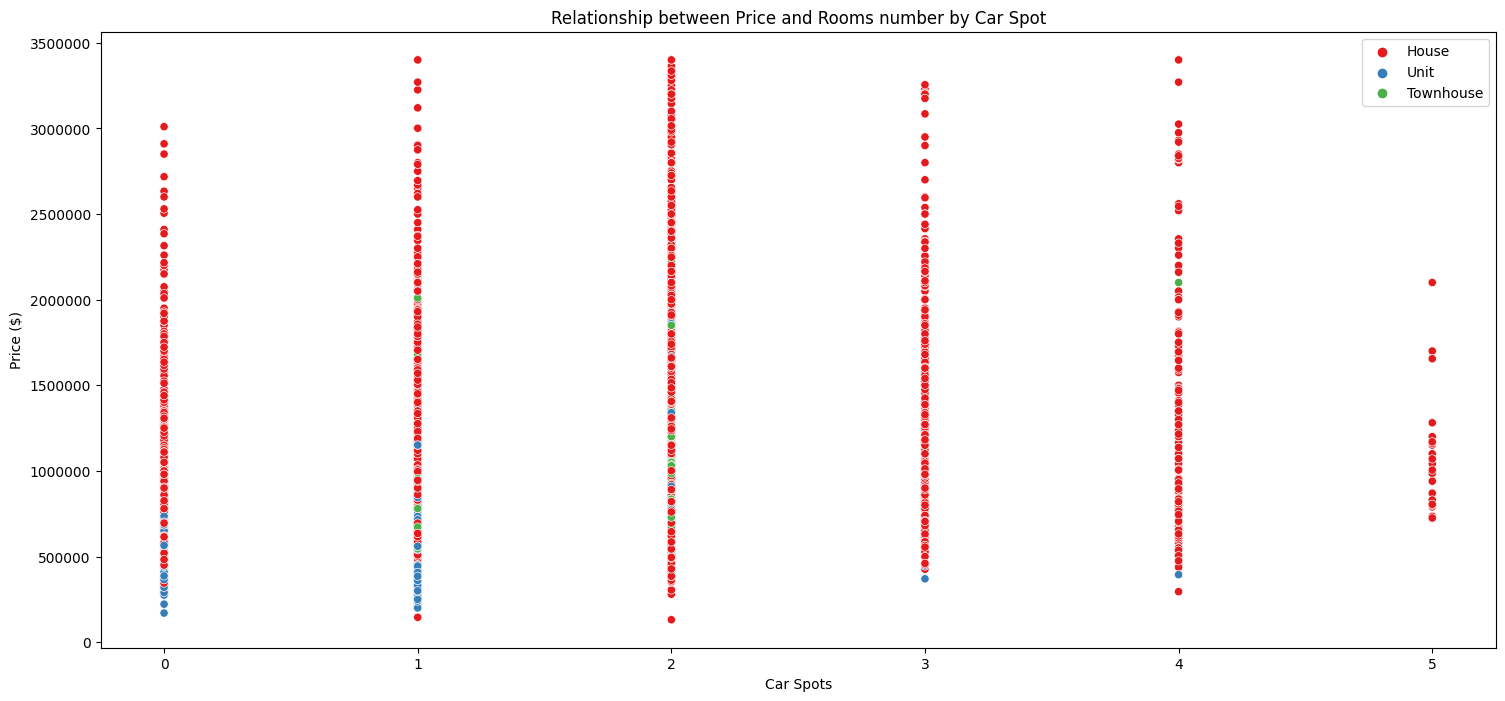

In [115]:
# Relationship between Price and Rooms number by Car Spot without outliers
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.scatterplot(x="Car", y='Price', hue="Type", data=ds_out, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Price and Rooms number by Car Spot")
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['House','Unit','Townhouse'], bbox_to_anchor=(1,1))
ax1.set(xlabel='Car Spots', ylabel='Price ($)')
ax1.ticklabel_format(useOffset=False, style='plain')

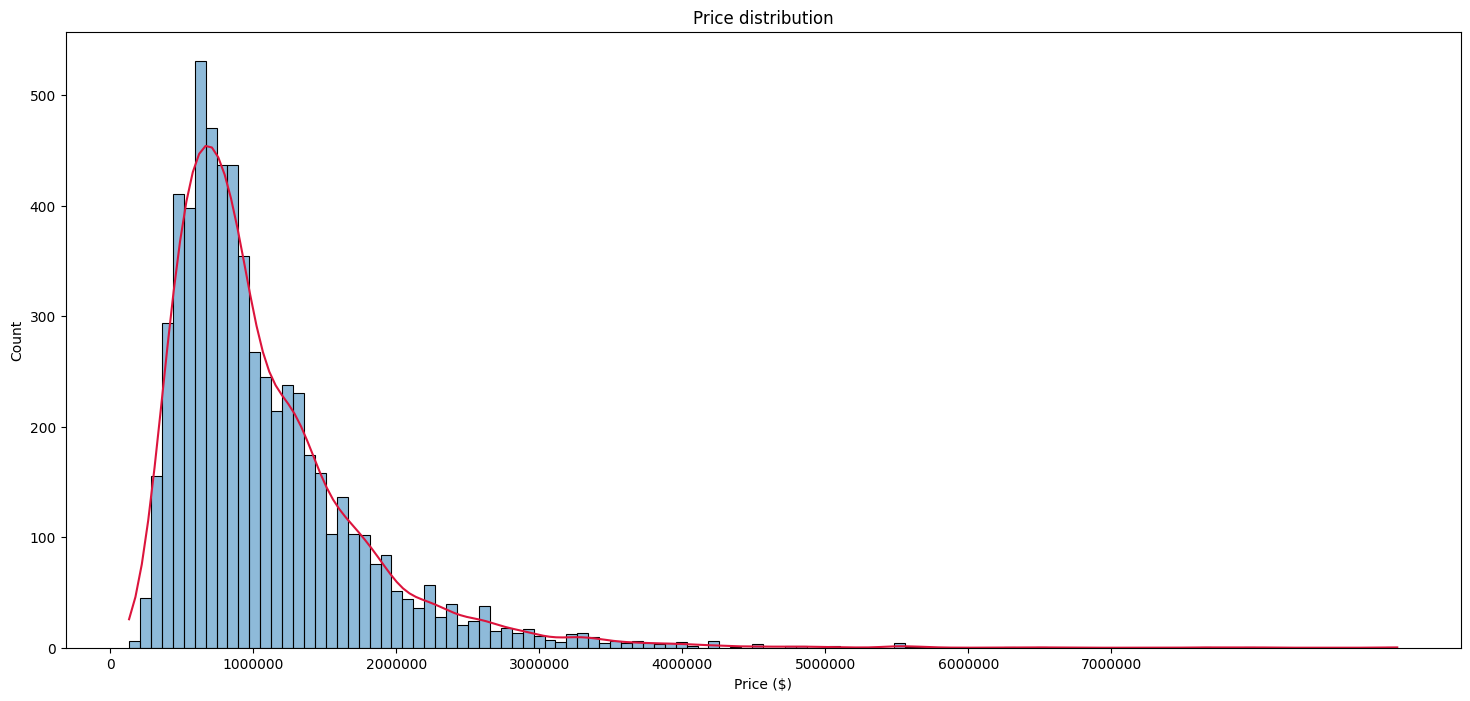

In [116]:
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.histplot(data=ds.Price, kde=True)
ax1.set_title("Price distribution")
ax1.lines[0].set_color('crimson')
ax1.set(xlabel='Price ($)')
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set_xticks(range(0,8000000,1000000))

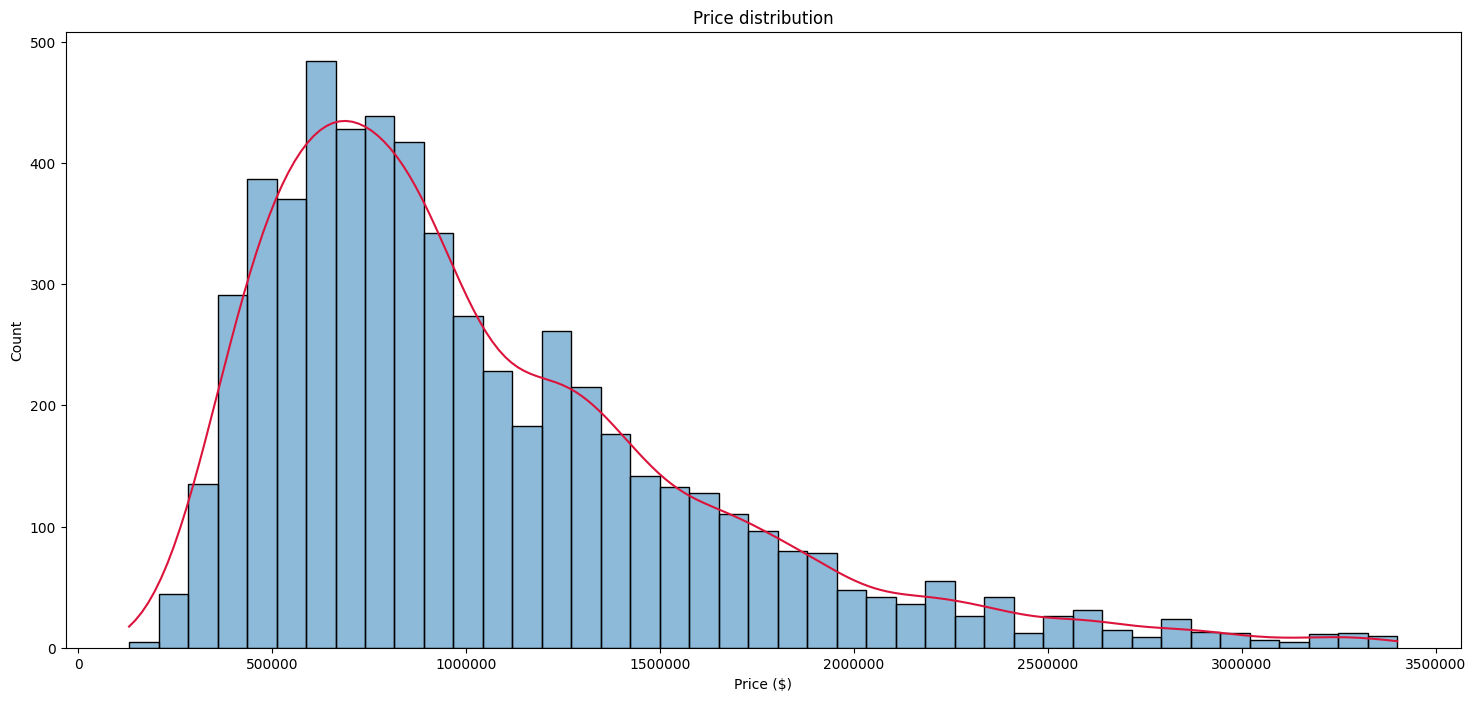

In [117]:
# Price distribution without outliers
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.histplot(data=ds_out.Price, kde=True)
ax1.set_title("Price distribution")
ax1.lines[0].set_color('crimson')
ax1.set(xlabel='Price ($)')
ax1.ticklabel_format(useOffset=False, style='plain')

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/3013285162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=ds_out.corr()
/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/3013285162.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,cmap="Greens",mask=np.zeros_like(corr, dtype=np.bool),annot=True)


<AxesSubplot: >

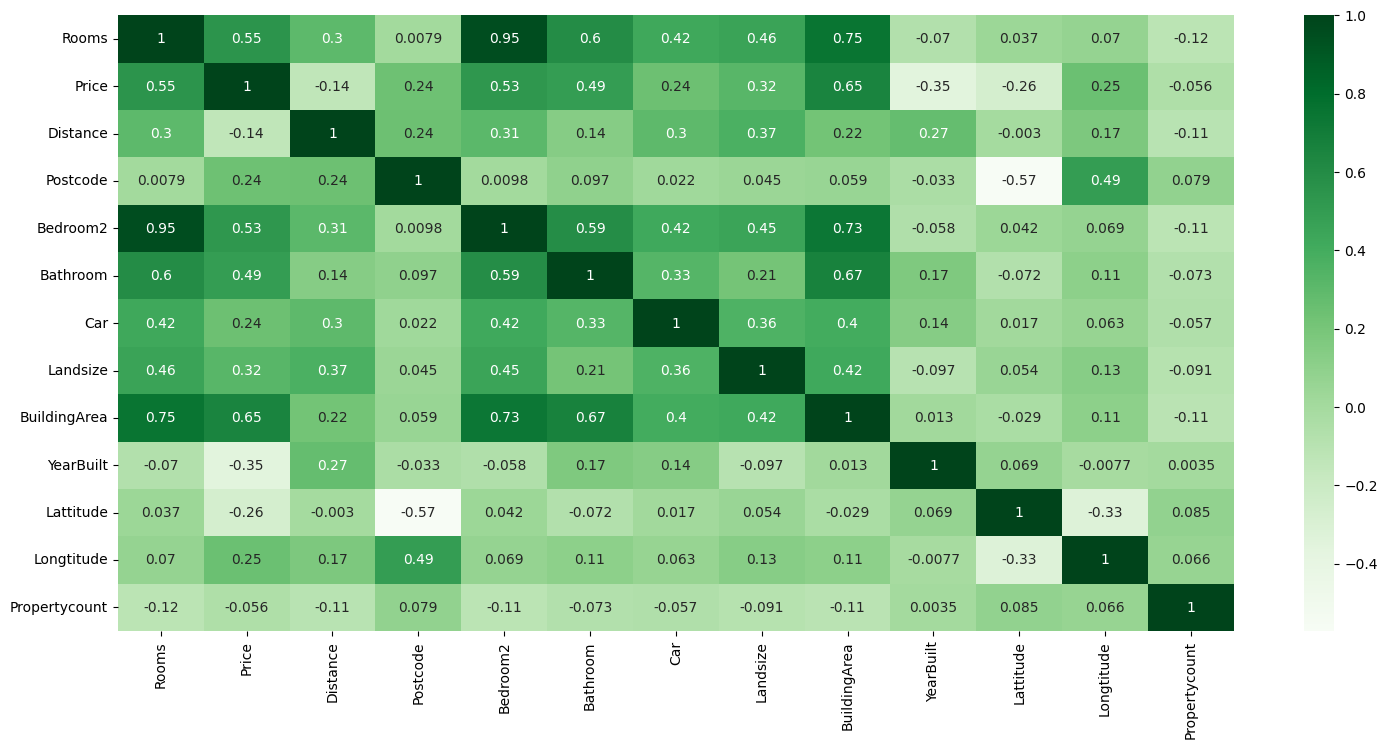

In [118]:
corr=ds_out.corr()
f, ax1 = plt.subplots(ncols=1, figsize=(18,8))
sns.heatmap(corr,cmap="Greens",mask=np.zeros_like(corr, dtype=np.bool),annot=True)

## Data Preparation

In [361]:
ds_out['Rooms'] = ds_out.Rooms.astype(float)
ds_out.dtypes

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/1753008306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_out['Rooms'] = ds_out.Rooms.astype(float)


Suburb            object
Address           object
Rooms            float64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [362]:
ds_out['Suburb']= ds_out['Suburb'].astype("category").cat.codes
ds_out['Address']= ds_out['Address'].astype("category").cat.codes
ds_out['Type']= ds_out['Type'].astype("category").cat.codes
ds_out['Method']= ds_out['Method'].astype("category").cat.codes
ds_out['SellerG']= ds_out['SellerG'].astype("category").cat.codes
ds_out['Date']= ds_out['Date'].astype("category").cat.codes
ds_out['CouncilArea']= ds_out['CouncilArea'].astype("category").cat.codes
ds_out['Regionname']= ds_out['Regionname'].astype("category").cat.codes

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/2274361866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_out['Suburb']= ds_out['Suburb'].astype("category").cat.codes
/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/2274361866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_out['Address']= ds_out['Address'].astype("category").cat.codes
/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/2274361866.py:3: SettingWithCopyWarning: 
A value is trying t

In [363]:
ds_out.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2654,2.0,0,1035000.0,1,15,41,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,26,-37.8079,144.9934,2,4019.0
1,0,4294,3.0,0,1465000.0,3,15,42,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,26,-37.8093,144.9944,2,4019.0
2,0,4642,4.0,0,1600000.0,4,105,43,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,26,-37.8072,144.9941,2,4019.0
3,0,975,3.0,0,1876000.0,1,105,46,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,26,-37.8024,144.9993,2,4019.0
4,0,5792,2.0,0,1636000.0,1,105,50,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,26,-37.8060,144.9954,2,4019.0


### Select k best

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [365]:
X = ds_out
y = ds_out.Price
#define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(5881, 10)


In [366]:
cols = fs.get_support(indices=True)
features_df_new = ds_out.iloc[:,cols]
features_df_new

,Rooms,Type,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,2.0,0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340
1,3.0,0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440
2,4.0,0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410
3,3.0,0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930
4,2.0,0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540
...,...,...,...,...,...,...,...,...,...,...
6190,3.0,0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468
6192,3.0,0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474
6193,1.0,2,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936
6194,2.0,2,2.0,1.0,1.0,0.0,61.60,2012.0,-37.85581,144.99025


### Forward Selection

In [367]:
X2 = ds_out.drop(['Price'], axis=1)
y2 = ds_out.Price

In [368]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import linear_model

In [369]:
lreg = linear_model.LinearRegression()
sfs1 = sfs(lreg, k_features=15, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [370]:
sfs1 = sfs1.fit(X2, y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2022-12-05 18:00:13] Features: 1/15 -- score: -190829960179.91815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2022-12-05 18:00:13] Features: 2/15 -- score: -146716995183.6329[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-12-05 18:00:14] Features: 3/15 -- score: -130773190032.9819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [371]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Suburb', 'Type', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname']


## Modeling

### K Best

#### Linear Regression - K best

In [372]:
### se der erro correr o que está comentado

#features = features_df_new.drop('Price',axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=23)


target = ds_out.Price
X_train, X_test, y_train, y_test = train_test_split(features_df_new,target,test_size=0.2,random_state=23)

In [373]:
features_df_new

,Rooms,Type,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,2.0,0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340
1,3.0,0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440
2,4.0,0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410
3,3.0,0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930
4,2.0,0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540
...,...,...,...,...,...,...,...,...,...,...
6190,3.0,0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468
6192,3.0,0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474
6193,1.0,2,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936
6194,2.0,2,2.0,1.0,1.0,0.0,61.60,2012.0,-37.85581,144.99025


In [374]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4704, 10)
(1177, 10)
(4704,)
(1177,)


In [375]:
from sklearn import linear_model
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_error
from math import sqrt


reg = linear_model.LinearRegression()

model = reg.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Predictions: ', predictions)
print('Corr. Coef: ',reg.score(features_df_new, target))
print('coedd: ', reg.coef_)
print('intercept: ', reg.intercept_)


Predictions:  [1132336.84588301  338238.60921735 1419599.88175607 ... 1310962.22726053
  717151.76713762 1350814.79050672]
Corr. Coef:  0.6412179169320578
coedd:  [-4.31315150e+03 -6.69734124e+04 -4.93871294e+02  1.68266515e+05
  6.99898287e+03  1.60613320e+01  4.05247437e+03 -5.34215152e+03
 -1.49201048e+06  7.16958738e+05]
intercept:  -149604032.075337


In [376]:
y_pred = model.predict(X_train)
median_ae = median_absolute_error(y_train, y_pred)
print(f"Median AE on training set: {median_ae}")
y_pred = model.predict(X_test)
median_ae = median_absolute_error(y_test, y_pred)
print(f"Median AE on testing set: {median_ae}\n")

y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"MSE on training set: {mse}")
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE on testing set: {mse}\n")

y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f"MAE on training set: {mae}")
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE on testing set: {mae}")

Median AE on training set: 182496.86304478347
Median AE on testing set: 182827.0583858788

MSE on training set: 116442848435.02118
MSE on testing set: 114917044557.87164

MAE on training set: 244737.76328337233
MAE on testing set: 246824.30354059345


#### Linear Regression with log transformation - K best

In [377]:
features_df_new['Price_log'] = np.log(ds_out['Price'])

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/3187698114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df_new['Price_log'] = np.log(ds_out['Price'])


In [378]:
target2 = features_df_new['Price_log']
features2 = features_df_new.drop(['Price_log'], axis = 1)


X2_train, X2_test, y2_train, y2_test = train_test_split(features2,target2,test_size=0.2,random_state=23)


In [379]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(4704, 10)
(1177, 10)
(4704,)
(1177,)


In [380]:
from sklearn import linear_model

reg2 = linear_model.LinearRegression()

model2 = reg2.fit(X2_train, y2_train)
predictions2 = model2.predict(X2_test)

print('Predictions: ', predictions2)
print('Corr. Coef: ',reg2.score(features2, target2))
print('coedd: ', reg2.coef_)
print('intercept: ', reg2.intercept_)


Predictions:  [13.80569481 12.9625367  14.11879444 ... 13.96414303 13.42926827
 14.03532118]
Corr. Coef:  0.6884270875361462
coedd:  [ 3.23109515e-02 -1.37882770e-01  1.30146488e-02  1.23711396e-01
  6.36058332e-03 -6.45200066e-05  3.00519624e-03 -4.39731572e-03
 -1.45968241e+00  8.51646630e-01]
intercept:  -156.9494020279894


In [381]:
y2_pred = model2.predict(X2_train)
median_ae2 = median_absolute_error(y2_train, y2_pred)
print(f"Median AE on training set: {median_ae2}")
y2_pred = model2.predict(X2_test)
median_ae2 = median_absolute_error(y2_test, y2_pred)
print(f"Median AE on testing set: {median_ae2}\n")

y2_pred = model2.predict(X2_train)
mse2 = mean_squared_error(y2_train, y2_pred)
print(f"MSE on training set: {mse2}")
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
print(f"MSE on testing set: {mse2}\n")

y2_pred = model2.predict(X2_train)
mae2 = mean_absolute_error(y2_train, y2_pred)
print(f"MAE on training set: {mae2}")
y2_pred = model2.predict(X2_test)
mae2 = mean_absolute_error(y2_test, y2_pred)
print(f"MAE on testing set: {mae2}")

Median AE on training set: 0.18789543986413015
Median AE on testing set: 0.19623597899167677

MSE on training set: 0.08506302985812937
MSE on testing set: 0.0857402582920623

MAE on training set: 0.227332715681132
MAE on testing set: 0.22945806846082897


#### Multiple Methods - Kbest

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor

In [175]:
pipelines = {
    'ridge':make_pipeline(Ridge(random_state=23)),
    'lasso':make_pipeline(Lasso(random_state=23)),
    'rf':make_pipeline(RandomForestRegressor(random_state=23)),
    'ridge':make_pipeline(Ridge(random_state=23)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=23)),
    'enet':make_pipeline(ElasticNet(random_state=23)),
    'pls':make_pipeline(PLSRegression()),
    'svr':make_pipeline(SVR()),
    'knn':make_pipeline(KNeighborsRegressor()),
    'bg':make_pipeline(BaggingRegressor(random_state=23))
}

In [176]:
#hypergrid para kbest sem log transform

hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2], #supostamente seria 1, mas dá erro
        'randomforestregressor__min_samples_leaf':[3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001]
    },
    'ridge':{
        'ridge__alpha':[0.23700000000000002]
    },
    'lasso':{
        'lasso__alpha':[0.999]
    },
    'enet':{
        'elasticnet__alpha':[0.001]
    },
    'knn':{
        'kneighborsregressor__n_neighbors':[22],
        'kneighborsregressor__metric':['manhattan']
    },
    'svr':{
        'svr__C': [100],
        'svr__gamma': [1],
        'svr__kernel': ['linear']
    },
    'bg':{
        'baggingregressor__n_estimators':[19],
        'baggingregressor__bootstrap':[True]
    },
    'pls':{
        'plsregression__n_components':[2],
        'plsregression__max_iter':[500]
    }

}

In [169]:
# #hypergrid para kbest com log transform

# hypergrid = {
#     'rf': {
#         'randomforestregressor__min_samples_split':[2],
#         'randomforestregressor__min_samples_leaf':[2]
#     },
#     'gb':{
#         'gradientboostingregressor__alpha':[0.001]
#     },
#     'ridge':{
#         'ridge__alpha':[0.25]
#     },
#     'lasso':{
#         'lasso__alpha':[0.001]
#     },
#     'enet':{
#         'elasticnet__alpha':[0.001]
#     },
#     'knn':{
#         'kneighborsregressor__n_neighbors':[15],
#         'kneighborsregressor__metric':['manhattan']
#     },
#     'svr':{
#         'svr__C': [0.1],
#         'svr__gamma': [1],
#         'svr__kernel': ['linear']
#     },
#     'bg':{
#         'baggingregressor__n_estimators':[19],
#         'baggingregressor__bootstrap':[True]
#     },
#     'pls':{
#         'plsregression__n_components':[2],
#         'plsregression__max_iter':[500]
#     }

# }

In [141]:
#hypergrid c/ ranges

# hypergrid = {
#     'rf': {
#         'randomforestregressor__min_samples_split':(range(1,30,1)),
#         'randomforestregressor__min_samples_leaf':(range(1,30,1))
#     },
#     'gb':{
#         'gradientboostingregressor__alpha':(np.arange(0.001,1.0,0.001))
#     },
#     'ridge':{
#         'ridge__alpha':(np.arange(0.001,1.0,0.001))
#     },
#     'lasso':{
#         'lasso__alpha':(np.arange(0.001,1.0,0.001))
#     },
#     'enet':{
#         'elasticnet__alpha':(np.arange(0.001,1.0,0.001))
#     },
#     'knn':{
#         'kneighborsregressor__n_neighbors':(range(1,30,1)),
#         'kneighborsregressor__metric':['minkowski','euclidean','manhattan']
#     },
#     'svr':{
#         'svr__C':[0.1,1, 10, 100] ,
#         'svr__gamma': [1,0.1,0.01,0.001],
#         'svr__kernel': ['linear']
#     },
#     'bg':{
#         'baggingregressor__n_estimators':(range(10,20,1)),
#         'baggingregressor__bootstrap':[True,False]
#     },
#     'pls':{
#         'plsregression__n_components':[1,2],
#         'plsregression__max_iter':(range(500,800,50))
#     }

# }

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [177]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been sucessfully fit.'.format(algo))
        print(model.best_params_)
    except NotFittedError as e:
        print(repr(e)) 

Starting training for ridge.
ridge has been sucessfully fit.
{'ridge__alpha': 0.23700000000000002}
Starting training for lasso.
lasso has been sucessfully fit.
{'lasso__alpha': 0.999}
Starting training for rf.
rf has been sucessfully fit.
{'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 2}
Starting training for gb.
gb has been sucessfully fit.
{'gradientboostingregressor__alpha': 0.001}
Starting training for enet.
enet has been sucessfully fit.
{'elasticnet__alpha': 0.001}
Starting training for pls.
pls has been sucessfully fit.
{'plsregression__max_iter': 500, 'plsregression__n_components': 2}
Starting training for svr.
svr has been sucessfully fit.
{'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'linear'}
Starting training for knn.
knn has been sucessfully fit.
{'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 22}
Starting training for bg.
bg has been sucessfully fit.
{'baggingregressor__bootstrap': True, 'baggi

In [160]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error

In [178]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{} MedianAE:{}'.format(algo, r2_score(y_test,yhat), mean_absolute_error(y_test,yhat), median_absolute_error(y_test,yhat)))

ridge scores - R2:0.6318571061112767 MAE:246796.6272518084 MedianAE:182887.3996667266
lasso scores - R2:0.631835916565362 MAE:246823.76773980755 MedianAE:182841.20288151503
rf scores - R2:0.8299397144577113 MAE:151094.53958056166 MedianAE:95247.93326118332
gb scores - R2:0.8089210792618378 MAE:164259.0625147461 MedianAE:110340.36304775137
enet scores - R2:0.6317852043251552 MAE:246716.53215646444 MedianAE:180800.23293861747
pls scores - R2:0.6116519902323154 MAE:253628.9862222876 MedianAE:184230.61256681965
svr scores - R2:0.5484960020740843 MAE:264425.4649355672 MedianAE:178485.52918497007
knn scores - R2:0.6001020418305916 MAE:245389.24364717695 MedianAE:166272.7272727273
bg scores - R2:0.8189141998879652 MAE:155650.86529833503 MedianAE:97934.21052631584


#### Multiple with log transformation - Kbest

In [171]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X2_train, y2_train)
        fit_models[algo] = model
        print('{} has been sucessfully fit.'.format(algo))
        print(model.best_params_)
    except NotFittedError as e:
        print(repr(e)) 

Starting training for ridge.
ridge has been sucessfully fit.
{'ridge__alpha': 0.25}
Starting training for lasso.
lasso has been sucessfully fit.
{'lasso__alpha': 0.001}
Starting training for rf.
rf has been sucessfully fit.
{'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 2}
Starting training for gb.
gb has been sucessfully fit.
{'gradientboostingregressor__alpha': 0.001}
Starting training for enet.
enet has been sucessfully fit.
{'elasticnet__alpha': 0.001}
Starting training for pls.
pls has been sucessfully fit.
{'plsregression__max_iter': 500, 'plsregression__n_components': 2}
Starting training for svr.
svr has been sucessfully fit.
{'svr__C': 0.1, 'svr__gamma': 1, 'svr__kernel': 'linear'}
Starting training for knn.
knn has been sucessfully fit.
{'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 15}
Starting training for bg.
bg has been sucessfully fit.
{'baggingregressor__bootstrap': True, 'baggingregressor__n_

In [172]:
for algo, model in fit_models.items():
    yhat2 = model.predict(X2_test)
    print('{} scores - R2:{} MAE:{} MedianAE:{}'.format(algo, r2_score(y2_test,yhat2), mean_absolute_error(y2_test,yhat2), median_absolute_error(y2_test,yhat2)))

ridge scores - R2:0.6807860554050802 MAE:0.22944957724886597 MedianAE:0.1957628280876058
lasso scores - R2:0.6810455019222119 MAE:0.22957406118106655 MedianAE:0.1987991719628024
rf scores - R2:0.8684402573856773 MAE:0.1371370042876608 MedianAE:0.10430922481049265
gb scores - R2:0.8565524759528824 MAE:0.14716498031261246 MedianAE:0.11760097100255251
enet scores - R2:0.6808670345853309 MAE:0.22966376935313967 MedianAE:0.19998486934083104
pls scores - R2:0.6661658220291344 MAE:0.23557131766234551 MedianAE:0.20194852126235396
svr scores - R2:-11.308576361746308 MAE:1.4507064333710429 MedianAE:1.3078229369831487
knn scores - R2:0.6523662505365485 MAE:0.23132872405375904 MedianAE:0.1800705968455265
bg scores - R2:0.8632646021463936 MAE:0.14042914236336523 MedianAE:0.11000811171348346


### Forward Selection

#### Linear regression - Forward Selection

In [382]:
features_fs = ds_out[['Suburb', 'Type', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname']]
target_fs = ds_out['Price']
X3_train, X3_test, y3_train, y3_test = train_test_split(features_fs,target_fs,test_size=0.2,random_state=23)

In [384]:
from sklearn import linear_model
from sklearn.metrics import median_absolute_error, mean_squared_error
from math import sqrt

reg = linear_model.LinearRegression()

model3 = reg.fit(X3_train, y3_train)
predictions2 = model3.predict(X3_test)

print('Predictions: ', predictions2)
print('Corr. Coef: ',reg.score(features_fs, target_fs))
print('coedd: ', reg.coef_)
print('intercept: ', reg.intercept_)


Predictions:  [ 982842.54441881  266966.76977679 1350766.22908816 ... 1163822.51644307
  641708.56175876 1487885.13116723]
Corr. Coef:  0.7364511715363657
coedd:  [-3.07662676e+02 -1.28770226e+05 -2.49934052e+02 -4.48591683e+04
  1.64127297e+03  5.14416310e+04  1.14793667e+05  2.56508922e+04
  1.61515655e+02  3.55296100e+03 -2.92550807e+03 -4.14902704e+03
 -6.78844782e+05  7.60587035e+05  1.41521512e+04]
intercept:  -134602064.02749017


In [385]:
y3_pred = model3.predict(X3_train)
median_ae = median_absolute_error(y3_train, y3_pred)
print(f"Median AE on training set: {median_ae}")
y3_pred = model3.predict(X3_test)
median_ae = median_absolute_error(y3_test, y3_pred)
print(f"Median AE on testing set: {median_ae}\n")

y3_pred = model3.predict(X3_train)
mse = mean_squared_error(y3_train, y3_pred)
print(f"MSE on training set: {mse}")
y3_pred = model3.predict(X3_test)
mae = mean_squared_error(y3_test, y3_pred)
print(f"MSE on testing set: {mse}\n")

y3_pred = model3.predict(X3_train)
mae = mean_absolute_error(y3_train, y3_pred)
print(f"MAE on training set: {mae}")
y3_pred = model3.predict(X3_test)
mae = mean_absolute_error(y3_test, y3_pred)
print(f"MAE on testing set: {mae}")

Median AE on training set: 162402.905710876
Median AE on testing set: 161587.87785068154

MSE on training set: 86203244254.02904
MSE on testing set: 86203244254.02904

MAE on training set: 211949.76616456517
MAE on testing set: 211161.75119668568


#### Linear regression with log transformation - Forward selection

In [386]:
ds_out['Price_log'] = np.log(ds_out['Price'])
features_fs2 = ds_out[['Suburb', 'Type', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname']]
target_fs2 = ds_out['Price_log']
ds_out = ds_out.drop('Price_log', axis=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(features_fs2,target_fs2,test_size=0.2,random_state=23)

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/2395320179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_out['Price_log'] = np.log(ds_out['Price'])


In [387]:
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(4704, 15)
(1177, 15)
(4704,)
(1177,)


In [388]:
reg = linear_model.LinearRegression()

model4 = reg.fit(X4_train, y4_train)
predictions2 = model4.predict(X4_test)

print('Predictions: ', predictions2)
print('R2 (Corr. Coeff.): ',reg.score(features_fs2, target_fs2))
print('coedd: ', reg.coef_)
print('intercept: ', reg.intercept_)

Predictions:  [13.63590221 12.91139902 14.04267376 ... 13.81778045 13.38445716
 14.17720677]
R2 (Corr. Coeff.):  0.783367756821286
coedd:  [-2.63735047e-04 -1.93969469e-01 -1.27350909e-04 -4.18220942e-02
  1.07124977e-03  9.21485092e-02  7.59095159e-02  2.61982247e-02
  8.92569324e-05  2.61729907e-03 -2.13325057e-03 -1.61531871e-03
 -9.77261905e-01  9.54740000e-01  8.96676808e-03]
intercept:  -161.06264432451772


In [389]:
y4_pred = model4.predict(X4_train)
median_ae = median_absolute_error(y4_train, y4_pred)
print(f"Median AE on training set: {median_ae}")
y4_pred = model4.predict(X4_test)
median_ae = median_absolute_error(y4_test, y4_pred)
print(f"Median AE on testing set: {median_ae}\n")

y4_pred = model4.predict(X4_train)
mse = mean_squared_error(y4_train, y4_pred)
print(f"MSE on training set: {mse}")
y4_pred = model4.predict(X4_test)
mae = mean_squared_error(y4_test, y4_pred)
print(f"MSE on testing set: {mse}\n")

y4_pred = model4.predict(X4_train)
mae = mean_absolute_error(y4_train, y4_pred)
print(f"MAE on training set: {mae}")
y4_pred = model4.predict(X4_test)
mae = mean_absolute_error(y4_test, y4_pred)
print(f"MAE on testing set: {mae}")

Median AE on training set: 0.15474526753935258
Median AE on testing set: 0.15267758282726618

MSE on training set: 0.0594631663453439
MSE on testing set: 0.0594631663453439

MAE on training set: 0.18883224889676875
MAE on testing set: 0.18737506025765688


#### Multiple Methods - Forward Selection

In [179]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X3_train, y3_train)
        fit_models[algo] = model
        print('{} has been sucessfully fit.'.format(algo))
        print(model.best_params_)
    except NotFittedError as e:
        print(repr(e)) 

Starting training for ridge.
ridge has been sucessfully fit.
{'ridge__alpha': 0.23700000000000002}
Starting training for lasso.
lasso has been sucessfully fit.
{'lasso__alpha': 0.999}
Starting training for rf.
rf has been sucessfully fit.
{'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 2}
Starting training for gb.
gb has been sucessfully fit.
{'gradientboostingregressor__alpha': 0.001}
Starting training for enet.
enet has been sucessfully fit.
{'elasticnet__alpha': 0.001}
Starting training for pls.
pls has been sucessfully fit.
{'plsregression__max_iter': 500, 'plsregression__n_components': 2}
Starting training for svr.
svr has been sucessfully fit.
{'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'linear'}
Starting training for knn.
knn has been sucessfully fit.
{'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 22}
Starting training for bg.
bg has been sucessfully fit.
{'baggingregressor__bootstrap': True, 'baggi

In [180]:
for algo, model in fit_models.items():
    yhat3 = model.predict(X3_test)
    print('{} scores - R2:{} MAE:{} MedianAE:{}'.format(algo, r2_score(y3_test,yhat3), mean_absolute_error(y3_test,yhat3), median_absolute_error(y3_test,yhat3)))

ridge scores - R2:0.7380398213025305 MAE:211164.2990343794 MedianAE:161680.13926760852
lasso scores - R2:0.7381145542139222 MAE:211161.66645108748 MedianAE:161599.09129852057
rf scores - R2:0.8318277917116044 MAE:151937.03717524474 MedianAE:99655.58441558387
gb scores - R2:0.8290563310856 MAE:155907.65756085492 MedianAE:105824.87494441983
enet scores - R2:0.7372961247010915 MAE:211293.7257036834 MedianAE:161316.62273035944
pls scores - R2:0.7214571698418939 MAE:218135.38844461055 MedianAE:174933.87083239376
svr scores - R2:0.6824823309453709 MAE:221266.84265458584 MedianAE:155299.13405663683
knn scores - R2:0.6987296286065199 MAE:210555.37873638683 MedianAE:144486.36363636365
bg scores - R2:0.8266198044236629 MAE:155228.42650807137 MedianAE:102368.42105263169


#### Multiple Methods with log transformation - Forward Selection

In [173]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X4_train, y4_train)
        fit_models[algo] = model
        print('{} has been sucessfully fit.'.format(algo))
        print(model.best_params_)
    except NotFittedError as e:
        print(repr(e)) 

Starting training for ridge.
ridge has been sucessfully fit.
{'ridge__alpha': 0.25}
Starting training for lasso.
lasso has been sucessfully fit.
{'lasso__alpha': 0.001}
Starting training for rf.
rf has been sucessfully fit.
{'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 2}
Starting training for gb.
gb has been sucessfully fit.
{'gradientboostingregressor__alpha': 0.001}
Starting training for enet.
enet has been sucessfully fit.
{'elasticnet__alpha': 0.001}
Starting training for pls.
pls has been sucessfully fit.
{'plsregression__max_iter': 500, 'plsregression__n_components': 2}
Starting training for svr.
svr has been sucessfully fit.
{'svr__C': 0.1, 'svr__gamma': 1, 'svr__kernel': 'linear'}
Starting training for knn.
knn has been sucessfully fit.
{'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 15}
Starting training for bg.
bg has been sucessfully fit.
{'baggingregressor__bootstrap': True, 'baggingregressor__n_

In [174]:
for algo, model in fit_models.items():
    yhat4 = model.predict(X3_test)
    print('{} scores - R2:{} MAE:{} MedianAE:{}'.format(algo, r2_score(y4_test,yhat4), mean_absolute_error(y4_test,yhat4), median_absolute_error(y4_test,yhat4)))

ridge scores - R2:0.7827314726658362 MAE:0.18736733049247994 MedianAE:0.1529953387550762
lasso scores - R2:0.780310670662197 MAE:0.18775054818545306 MedianAE:0.15430649527059792
rf scores - R2:0.8756584107776031 MAE:0.13371194200319625 MedianAE:0.10626176642731977
gb scores - R2:0.8663274481559485 MAE:0.14249514334788968 MedianAE:0.11662173217855454
enet scores - R2:0.7808030733851047 MAE:0.1876481137715819 MedianAE:0.1534786507015493
pls scores - R2:0.761673223238598 MAE:0.1977173286911654 MedianAE:0.16273478127190621
svr scores - R2:-1.680515512158149 MAE:0.6802936212110936 MedianAE:0.5742575109091259
knn scores - R2:0.7186800665145777 MAE:0.20505684814085076 MedianAE:0.16100561055766782
bg scores - R2:0.8669918477942905 MAE:0.14096138923367624 MedianAE:0.11299174292229885


### K-Fold Cross-Validation

#### K-Fold Cross-Validation - Kbest

In [390]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression, PLSCanonical


In [391]:
from sklearn.model_selection import KFold

# Creating Train and Test Groups with K-Fold Validation

features_df_new = features_df_new.drop('Price_log', axis = 1)
# target_k = target_fs2


cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [392]:
#adicionar MSE, RMSE e Coeff.Variation

score_lr = cross_val_score(LinearRegression(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Linear Regression: {score_lr}\n')

score_lasso = cross_val_score(Lasso(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Lasso: {score_lasso}\n')

score_ridge = cross_val_score(Ridge(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Ridge: {score_ridge}\n')

score_gbr = cross_val_score(GradientBoostingRegressor(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Gradient Boosting Regressor: {score_gbr}\n')

score_enet = cross_val_score(ElasticNet(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Elastic Net: {score_enet}\n')

score_rf = cross_val_score(RandomForestRegressor(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Random Forest Regressor: {score_rf}\n')

score_pls = cross_val_score(PLSRegression(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Partial Least Squares: {score_pls}\n')

score_bg = cross_val_score(BaggingRegressor(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for Bagging: {score_bg}\n')

score_svm = cross_val_score(SVR(), features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for SVM: {score_svm}\n')

score_knn = cross_val_score(KNeighborsRegressor(),features_df_new, target, cv = cv, scoring='r2').mean()
print(f'R2 values for KNN: {score_knn}\n')


R2 values for Linear Regression: 0.639180662570142

R2 values for Lasso: 0.6391811477527046

R2 values for Ridge: 0.6391414847843684

R2 values for Gradient Boosting Regressor: 0.811809289111831

R2 values for Elastic Net: 0.5715812951402864

R2 values for Random Forest Regressor: 0.829410895626227

R2 values for Partial Least Squares: 0.6145316447721696

R2 values for Bagging: 0.813890956217573

R2 values for SVM: -0.07443353035866322

R2 values for KNN: 0.5495771911813575



In [393]:

mae_lr = cross_val_score(LinearRegression(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Linear Regression: {abs(mae_lr)}\n')

mae_lasso = cross_val_score(Lasso(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Lasso: {abs(mae_lasso)}\n')

mae_ridge = cross_val_score(Ridge(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Erro values for Ridge: {abs(mae_ridge)}\n')

mae_gbr = cross_val_score(GradientBoostingRegressor(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Gradient Boosting Regressor: {abs(mae_gbr)}\n')

mae_enet = cross_val_score(ElasticNet(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Elastic Net: {abs(mae_enet)}\n')

mae_rf = cross_val_score(RandomForestRegressor(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Random Forest Regressor: {abs(mae_rf)}\n')

mae_pls = cross_val_score(PLSRegression(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Partial Least Squares: {abs(mae_pls)}\n')

mae_bg = cross_val_score(BaggingRegressor(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Bagging: {abs(mae_bg)}\n')

mae_svm = cross_val_score(SVR(), features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for SVM: {mae_svm}\n')

mae_knn = cross_val_score(KNeighborsRegressor(),features_df_new, target, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for KNN: {mae_knn}\n')

Mean Absolute Error values for Linear Regression: 245729.40397533207

Mean Absolute Error values for Lasso: 245729.3257161104

Mean Absolute Erro values for Ridge: 245755.27043063255

Mean Absolute Error values for Gradient Boosting Regressor: 166990.76799591884

Mean Absolute Error values for Elastic Net: 270438.85054137185

Mean Absolute Error values for Random Forest Regressor: 153012.0952353368

Mean Absolute Error values for Partial Least Squares: 253840.02215292508

Mean Absolute Error values for Bagging: 162940.72907854314

Mean Absolute Error values for SVM: -421498.90867687884

Mean Absolute Error values for KNN: -265138.13438359724



In [394]:

mse_lr = cross_val_score(LinearRegression(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Linear Regression: {abs(mse_lr)}\n')

mse_lasso = cross_val_score(Lasso(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Lasso: {abs(mse_lasso)}\n')

mse_ridge = cross_val_score(Ridge(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Erro values for Ridge: {abs(mse_ridge)}\n')

mse_gbr = cross_val_score(GradientBoostingRegressor(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Gradient Boosting Regressor: {abs(mse_gbr)}\n')

mse_enet = cross_val_score(ElasticNet(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Elastic Net: {abs(mse_enet)}\n')

mse_rf = cross_val_score(RandomForestRegressor(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Random Forest Regressor: {abs(mse_rf)}\n')

mse_pls = cross_val_score(PLSRegression(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Partial Least Squares: {abs(mse_pls)}\n')

mse_bg = cross_val_score(BaggingRegressor(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Bagging: {abs(mse_bg)}\n')

mse_svm = cross_val_score(SVR(), features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for SVM: {mse_svm}\n')

mse_knn = cross_val_score(KNeighborsRegressor(),features_df_new, target, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for KNN: {mse_knn}\n')

Mean Squared Error values for Linear Regression: 116693065325.27344

Mean Squared Error values for Lasso: 116692915920.15762

Mean Squared Erro values for Ridge: 116706177981.93466

Mean Squared Error values for Gradient Boosting Regressor: 60877163158.409386

Mean Squared Error values for Elastic Net: 138553567337.63385

Mean Squared Error values for Random Forest Regressor: 55173428640.866455

Mean Squared Error values for Partial Least Squares: 124501871352.96977

Mean Squared Error values for Bagging: 61567663828.15218

Mean Squared Error values for SVM: -347617437192.83514

Mean Squared Error values for KNN: -145677353312.33688



In [395]:

rmse_lr = cross_val_score(LinearRegression(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Linear Regression: {abs(rmse_lr)}\n')

rmse_lasso = cross_val_score(Lasso(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Lasso: {abs(rmse_lasso)}\n')

rmse_ridge = cross_val_score(Ridge(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Erro values for Ridge: {abs(rmse_ridge)}\n')

rmse_gbr = cross_val_score(GradientBoostingRegressor(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Gradient Boosting Regressor: {abs(rmse_gbr)}\n')

rmse_enet = cross_val_score(ElasticNet(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Elastic Net: {abs(rmse_enet)}\n')

rmse_rf = cross_val_score(RandomForestRegressor(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Random Forest Regressor: {abs(rmse_rf)}\n')

rmse_pls = cross_val_score(PLSRegression(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Partial Least Squares: {abs(rmse_pls)}\n')

rmse_bg = cross_val_score(BaggingRegressor(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Bagging: {abs(rmse_bg)}\n')

rmse_svm = cross_val_score(SVR(), features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for SVM: {rmse_svm}\n')

rmse_knn = cross_val_score(KNeighborsRegressor(),features_df_new, target, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for KNN: {rmse_knn}\n')

Root Mean Squared Error values for Linear Regression: 341348.7228374383

Root Mean Squared Error values for Lasso: 341348.5074899124

Root Mean Squared Erro values for Ridge: 341368.69179744757

Root Mean Squared Error values for Gradient Boosting Regressor: 246411.30650564446

Root Mean Squared Error values for Elastic Net: 372001.20599949895

Root Mean Squared Error values for Random Forest Regressor: 233984.80862313788

Root Mean Squared Error values for Partial Least Squares: 352683.87109982874

Root Mean Squared Error values for Bagging: 246846.9597438777

Root Mean Squared Error values for SVM: -589254.3446845483

Root Mean Squared Error values for KNN: -381377.1849348469



In [397]:

med_lr = cross_val_score(LinearRegression(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Linear Regression: {abs(med_lr)}\n')

med_lasso = cross_val_score(Lasso(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Lasso: {abs(med_lasso)}\n')

med_ridge = cross_val_score(Ridge(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Ridge: {abs(med_ridge)}\n')

med_gbr = cross_val_score(GradientBoostingRegressor(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Gradient Boosting Regressor: {abs(med_gbr)}\n')

med_enet = cross_val_score(ElasticNet(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Elastic Net: {abs(med_enet)}\n')

med_rf = cross_val_score(RandomForestRegressor(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Random Forest Regressor: {abs(med_rf)}\n')

med_pls = cross_val_score(PLSRegression(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Partial Least Squares: {abs(med_pls)}\n')

med_bg = cross_val_score(BaggingRegressor(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Bagging: {abs(med_bg)}\n')

med_svm = cross_val_score(SVR(), features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for SVM: {med_svm}\n')

med_knn = cross_val_score(KNeighborsRegressor(),features_df_new, target, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for KNN: {med_knn}\n')

Median Absolute Error values for Linear Regression: 183323.50276982487

Median Absolute Error values for Lasso: 183326.15661756694

Median Absolute Error values for Ridge: 183093.71299199163

Median Absolute Error values for Gradient Boosting Regressor: 114883.23324635271

Median Absolute Error values for Elastic Net: 199634.46285576606

Median Absolute Error values for Random Forest Regressor: 96655.84099999999

Median Absolute Error values for Partial Least Squares: 186235.11407301523

Median Absolute Error values for Bagging: 104237.3

Median Absolute Error values for SVM: -316987.79460101394

Median Absolute Error values for KNN: -179015.0



#### K-Fold Cross Validation com log transformation- K-best

In [398]:
#adicionar MSE, RMSE e Coeff.Variation

score_lr = cross_val_score(LinearRegression(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Linear Regression: {score_lr}\n')

score_lasso = cross_val_score(Lasso(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Lasso: {score_lasso}\n')

score_ridge = cross_val_score(Ridge(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Ridge: {score_ridge}\n')

score_gbr = cross_val_score(GradientBoostingRegressor(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Gradient Boosting Regressor: {score_gbr}\n')

score_enet = cross_val_score(ElasticNet(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Elastic Net: {score_enet}\n')

score_rf = cross_val_score(RandomForestRegressor(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Random Forest Regressor: {score_rf}\n')

score_pls = cross_val_score(PLSRegression(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Partial Least Squares: {score_pls}\n')

score_bg = cross_val_score(BaggingRegressor(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for Bagging: {score_bg}\n')

score_svm = cross_val_score(SVR(), features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for SVM: {score_svm}\n')

score_knn = cross_val_score(KNeighborsRegressor(),features2, target2, cv = cv, scoring='r2').mean()
print(f'R2 values for KNN: {score_knn}\n')



R2 values for Linear Regression: 0.686898666308063

R2 values for Lasso: 0.5665148858453743

R2 values for Ridge: 0.6868499405183962

R2 values for Gradient Boosting Regressor: 0.8581339362131881

R2 values for Elastic Net: 0.5693504441803194

R2 values for Random Forest Regressor: 0.8703213735526543

R2 values for Partial Least Squares: 0.6723572524009434

R2 values for Bagging: 0.85432654581648

R2 values for SVM: 0.5765269443173756

R2 values for KNN: 0.6008747266220963



In [399]:

mae_lr = cross_val_score(LinearRegression(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Linear Regression: {abs(mae_lr)}\n')

mae_lasso = cross_val_score(Lasso(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Lasso: {abs(mae_lasso)}\n')

mae_ridge = cross_val_score(Ridge(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Erro values for Ridge: {abs(mae_ridge)}\n')

mae_gbr = cross_val_score(GradientBoostingRegressor(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Gradient Boosting Regressor: {abs(mae_gbr)}\n')

mae_enet = cross_val_score(ElasticNet(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Elastic Net: {abs(mae_enet)}\n')

mae_rf = cross_val_score(RandomForestRegressor(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Random Forest Regressor: {abs(mae_rf)}\n')

mae_pls = cross_val_score(PLSRegression(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Partial Least Squares: {abs(mae_pls)}\n')

mae_bg = cross_val_score(BaggingRegressor(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Bagging: {abs(mae_bg)}\n')

mae_svm = cross_val_score(SVR(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for SVM: {abs(score_svm)}\n')

mae_knn = cross_val_score(KNeighborsRegressor(),features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for KNN: {abs(score_knn)}\n')

Mean Absolute Error values for Linear Regression: 0.22833439659800542

Mean Absolute Error values for Lasso: 0.27017398458753145

Mean Absolute Erro values for Ridge: 0.2285136699531749

Mean Absolute Error values for Gradient Boosting Regressor: 0.14896015181785136

Mean Absolute Error values for Elastic Net: 0.2687330628304162

Mean Absolute Error values for Random Forest Regressor: 0.13931374734662422

Mean Absolute Error values for Partial Least Squares: 0.23355906647220256

Mean Absolute Error values for Bagging: 0.1467747458919732

Mean Absolute Error values for SVM: 0.5765269443173756

Mean Absolute Error values for KNN: 0.6008747266220963



In [ ]:

mse_lr = cross_val_score(LinearRegression(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Linear Regression: {abs(mse_lr)}\n')

mse_lasso = cross_val_score(Lasso(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Lasso: {abs(mse_lasso)}\n')

mse_ridge = cross_val_score(Ridge(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Erro values for Ridge: {abs(mse_ridge)}\n')

mse_gbr = cross_val_score(GradientBoostingRegressor(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Gradient Boosting Regressor: {abs(mse_gbr)}\n')

mse_enet = cross_val_score(ElasticNet(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Elastic Net: {abs(mse_enet)}\n')

mse_rf = cross_val_score(RandomForestRegressor(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Random Forest Regressor: {abs(mse_rf)}\n')

mse_pls = cross_val_score(PLSRegression(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Partial Least Squares: {abs(mse_pls)}\n')

mse_bg = cross_val_score(BaggingRegressor(), features2, target2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Bagging: {abs(mse_bg)}\n')

mse_svm = cross_val_score(SVR(), features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Squared Error values for SVM: {abs(mse_svm)}\n')

mse_knn = cross_val_score(KNeighborsRegressor(),features2, target2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Squared Error values for KNN: {abs(mse_knn)}\n')

In [ ]:

rmse_lr = cross_val_score(LinearRegression(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Linear Regression: {abs(rmse_lr)}\n')

rmse_lasso = cross_val_score(Lasso(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Lasso: {abs(rmse_lasso)}\n')

rmse_ridge = cross_val_score(Ridge(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Erro values for Ridge: {abs(rmse_ridge)}\n')

rmse_gbr = cross_val_score(GradientBoostingRegressor(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Gradient Boosting Regressor: {abs(rmse_gbr)}\n')

rmse_enet = cross_val_score(ElasticNet(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Elastic Net: {abs(rmse_enet)}\n')

rmse_rf = cross_val_score(RandomForestRegressor(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Random Forest Regressor: {abs(rmse_rf)}\n')

rmse_pls = cross_val_score(PLSRegression(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Partial Least Squares: {abs(rmse_pls)}\n')

rmse_bg = cross_val_score(BaggingRegressor(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Bagging: {abs(rmse_bg)}\n')

rmse_svm = cross_val_score(SVR(), features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for SVM: {abs(rmse_svm)}\n')

rmse_knn = cross_val_score(KNeighborsRegressor(),features2, target2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for KNN: {abs(rmse_knn)}\n')

In [400]:

med_lr = cross_val_score(LinearRegression(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Linear Regression: {abs(med_lr)}\n')

med_lasso = cross_val_score(Lasso(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Lasso: {abs(med_lasso)}\n')

med_ridge = cross_val_score(Ridge(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Ridge: {abs(med_ridge)}\n')

med_gbr = cross_val_score(GradientBoostingRegressor(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Gradient Boosting Regressor: {abs(med_gbr)}\n')

med_enet = cross_val_score(ElasticNet(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Elastic Net: {abs(med_enet)}\n')

med_rf = cross_val_score(RandomForestRegressor(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Random Forest Regressor: {abs(med_rf)}\n')

med_pls = cross_val_score(PLSRegression(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Partial Least Squares: {abs(med_pls)}\n')

med_bg = cross_val_score(BaggingRegressor(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Bagging: {abs(med_bg)}\n')

med_svm = cross_val_score(SVR(), features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for SVM: {med_svm}\n')

med_knn = cross_val_score(KNeighborsRegressor(),features2, target2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for KNN: {med_knn}\n')

Median Absolute Error values for Linear Regression: 0.19081630624549833

Median Absolute Error values for Lasso: 0.2249633074685809

Median Absolute Error values for Ridge: 0.1912664458229667

Median Absolute Error values for Gradient Boosting Regressor: 0.1196736509788984

Median Absolute Error values for Elastic Net: 0.22262467427979732

Median Absolute Error values for Random Forest Regressor: 0.11029986033866752

Median Absolute Error values for Partial Least Squares: 0.1926302562442138

Median Absolute Error values for Bagging: 0.1162924258227764

Median Absolute Error values for SVM: -0.21693729141252494

Median Absolute Error values for KNN: -0.19856725865498676



#### K-Fold - FS

In [401]:
score_lr = cross_val_score(LinearRegression(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Linear Regression: {score_lr}\n')

score_lasso = cross_val_score(Lasso(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Lasso: {score_lasso}\n')

score_ridge = cross_val_score(Ridge(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Ridge: {score_ridge}\n')

score_gbr = cross_val_score(GradientBoostingRegressor(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Gradient Boosting Regressor: {score_gbr}\n')

score_enet = cross_val_score(ElasticNet(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Elastic Net: {score_enet}\n')

score_rf = cross_val_score(RandomForestRegressor(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Random Forest Regressor: {score_rf}\n')

score_pls = cross_val_score(PLSRegression(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Partial Least Squares: {score_pls}\n')

score_bg = cross_val_score(BaggingRegressor(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for Bagging: {score_bg}\n')

score_svm = cross_val_score(SVR(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for SVM: {score_svm}\n')

score_knn = cross_val_score(KNeighborsRegressor(), features_fs, target_fs, cv = cv, scoring='r2').mean()
print(f'R2 values for KNN: {score_knn}\n')

R2 values for Linear Regression: 0.7349218322590312

R2 values for Lasso: 0.7349219404516634

R2 values for Ridge: 0.7349255521897933

R2 values for Gradient Boosting Regressor: 0.826534108424009

R2 values for Elastic Net: 0.7069143253827498

R2 values for Random Forest Regressor: 0.8388715121770366

R2 values for Partial Least Squares: 0.7150560467609115

R2 values for Bagging: 0.8184807129143934

R2 values for SVM: -0.07451448000612097

R2 values for KNN: 0.648753573909507



In [402]:
mae_lr = cross_val_score(LinearRegression(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Linear Regression: {abs(mae_lr)}\n')

mae_lasso = cross_val_score(Lasso(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Lasso: {abs(mae_lasso)}\n')

mae_ridge = cross_val_score(Ridge(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Erro values for Ridge: {abs(mae_ridge)}\n')

mae_gbr = cross_val_score(GradientBoostingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Gradient Boosting Regressor: {abs(mae_gbr)}\n')

mae_enet = cross_val_score(ElasticNet(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Elastic Net: {abs(mae_enet)}\n')

mae_rf = cross_val_score(RandomForestRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Random Forest Regressor: {abs(mae_rf)}\n')

mae_pls = cross_val_score(PLSRegression(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Partial Least Squares: {abs(mae_pls)}\n')

mae_bg = cross_val_score(BaggingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Bagging: {abs(mae_bg)}\n')

mae_svm = cross_val_score(SVR(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for SVM: {mae_svm}\n')

mae_knn = cross_val_score(KNeighborsRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error valuesr KNN: {mae_knn}\n')

Mean Absolute Error values for Linear Regression: 212147.61529959235

Mean Absolute Error values for Lasso: 212146.82117652413

Mean Absolute Erro values for Ridge: 212065.4292294606

Mean Absolute Error values for Gradient Boosting Regressor: 158543.46646446202

Mean Absolute Error values for Elastic Net: 220827.75762631054

Mean Absolute Error values for Random Forest Regressor: 147677.40163442882

Mean Absolute Error values for Partial Least Squares: 221224.10885311765

Mean Absolute Error values for Bagging: 158121.1063502651

Mean Absolute Error values for SVM: -421513.65268153173

Mean Absolute Error valuesr KNN: -227863.50500127045



In [ ]:
mse_lr = cross_val_score(LinearRegression(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Linear Regression: {abs(mse_lr)}\n')

mse_lasso = cross_val_score(Lasso(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Lasso: {abs(mse_lasso)}\n')

mse_ridge = cross_val_score(Ridge(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Erro values for Ridge: {abs(mse_ridge)}\n')

mse_gbr = cross_val_score(GradientBoostingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Gradient Boosting Regressor: {abs(mse_gbr)}\n')

mse_enet = cross_val_score(ElasticNet(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Elastic Net: {abs(mse_enet)}\n')

mse_rf = cross_val_score(RandomForestRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Random Forest Regressor: {abs(mse_rf)}\n')

mse_pls = cross_val_score(PLSRegression(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Partial Least Squares: {abs(mse_pls)}\n')

mse_bg = cross_val_score(BaggingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Bagging: {abs(mse_bg)}\n')

mse_svm = cross_val_score(SVR(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for SVM: {mse_svm}\n')

mse_knn = cross_val_score(KNeighborsRegressor(), features_fs, target_fs, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error valuesr KNN: {mse_knn}\n')

In [ ]:
rmse_lr = cross_val_score(LinearRegression(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Linear Regression: {abs(rmse_lr)}\n')

rmse_lasso = cross_val_score(Lasso(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Lasso: {abs(rmse_lasso)}\n')

rmse_ridge = cross_val_score(Ridge(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Erro values for Ridge: {abs(rmse_ridge)}\n')

rmse_gbr = cross_val_score(GradientBoostingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Gradient Boosting Regressor: {abs(rmse_gbr)}\n')

rmse_enet = cross_val_score(ElasticNet(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Elastic Net: {abs(rmse_enet)}\n')

rmse_rf = cross_val_score(RandomForestRegressor(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Random Forest Regressor: {abs(rmse_rf)}\n')

rmse_pls = cross_val_score(PLSRegression(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Partial Least Squares: {abs(rmse_pls)}\n')

rmse_bg = cross_val_score(BaggingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Bagging: {abs(rmse_bg)}\n')

rmse_svm = cross_val_score(SVR(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for SVM: {rmse_svm}\n')

rmse_knn = cross_val_score(KNeighborsRegressor(), features_fs, target_fs, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for KNN: {rmse_knn}\n')

In [403]:

med_lr = cross_val_score(LinearRegression(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Linear Regression: {abs(med_lr)}\n')

med_lasso = cross_val_score(Lasso(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Lasso: {abs(med_lasso)}\n')

med_ridge = cross_val_score(Ridge(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Ridge: {abs(med_ridge)}\n')

med_gbr = cross_val_score(GradientBoostingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Gradient Boosting Regressor: {abs(med_gbr)}\n')

med_enet = cross_val_score(ElasticNet(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Elastic Net: {abs(med_enet)}\n')

med_rf = cross_val_score(RandomForestRegressor(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Random Forest Regressor: {abs(med_rf)}\n')

med_pls = cross_val_score(PLSRegression(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Partial Least Squares: {abs(med_pls)}\n')

med_bg = cross_val_score(BaggingRegressor(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Bagging: {abs(med_bg)}\n')

med_svm = cross_val_score(SVR(), features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for SVM: {med_svm}\n')

med_knn = cross_val_score(KNeighborsRegressor(),features_fs, target_fs, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for KNN: {med_knn}\n')

Median Absolute Error values for Linear Regression: 162085.6664268449

Median Absolute Error values for Lasso: 162085.17206735612

Median Absolute Error values for Ridge: 161750.5045992747

Median Absolute Error values for Gradient Boosting Regressor: 105082.8021646834

Median Absolute Error values for Elastic Net: 165132.37428203048

Median Absolute Error values for Random Forest Regressor: 93279.59199999999

Median Absolute Error values for Partial Least Squares: 169435.75323138878

Median Absolute Error values for Bagging: 99812.5

Median Absolute Error values for SVM: -316996.1365657499

Median Absolute Error values for KNN: -147845.0



#### K-Fold FS com log transformation

In [404]:
score_lr = cross_val_score(LinearRegression(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Linear Regression: {score_lr}\n')

score_lasso = cross_val_score(Lasso(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Lasso: {score_lasso}\n')

score_ridge = cross_val_score(Ridge(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Ridge: {score_ridge}\n')

score_gbr = cross_val_score(GradientBoostingRegressor(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Gradient Boosting Regressor: {score_gbr}\n')

score_enet = cross_val_score(ElasticNet(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Elastic Net: {score_enet}\n')

score_rf = cross_val_score(RandomForestRegressor(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Random Forest Regressor: {score_rf}\n')

score_pls = cross_val_score(PLSRegression(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Partial Least Squares: {score_pls}\n')

score_bg = cross_val_score(BaggingRegressor(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for Bagging: {score_bg}\n')

score_svm = cross_val_score(SVR(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for SVM: {score_svm}\n')

score_knn = cross_val_score(KNeighborsRegressor(), features_fs2, target_fs2, cv = cv, scoring='r2').mean()
print(f'R2 values for KNN: {score_knn}\n')

R2 values for Linear Regression: 0.7821731547823643

R2 values for Lasso: 0.5945681363966445

R2 values for Ridge: 0.7821480801288123

R2 values for Gradient Boosting Regressor: 0.8683239680715346

R2 values for Elastic Net: 0.6093560575855824

R2 values for Random Forest Regressor: 0.8747019410617496

R2 values for Partial Least Squares: 0.7635454680199331

R2 values for Bagging: 0.8618412498811339

R2 values for SVM: 0.6040668491210166

R2 values for KNN: 0.6935048864130456



In [405]:
mae_lr = cross_val_score(LinearRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Linear Regression: {abs(mae_lr)}\n')

mae_lasso = cross_val_score(Lasso(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Lasso: {abs(mae_lasso)}\n')

mae_ridge = cross_val_score(Ridge(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Erro values for Ridge: {abs(mae_ridge)}\n')

mae_gbr = cross_val_score(GradientBoostingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Gradient Boosting Regressor: {abs(mae_gbr)}\n')

mae_enet = cross_val_score(ElasticNet(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Elastic Net: {abs(mae_enet)}\n')

mae_rf = cross_val_score(RandomForestRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Random Forest Regressor: {abs(mae_rf)}\n')

mae_pls = cross_val_score(PLSRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Partial Least Squares: {abs(mae_pls)}\n')

mae_bg = cross_val_score(BaggingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for Bagging: {abs(mae_bg)}\n')

mae_svm = cross_val_score(SVR(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error values for SVM: {mae_svm}\n')

mae_knn = cross_val_score(KNeighborsRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_absolute_error').mean()
print(f'Mean Absolute Error valuesr KNN: {mae_knn}\n')

Mean Absolute Error values for Linear Regression: 0.1890012850156027

Mean Absolute Error values for Lasso: 0.2583183481885357

Mean Absolute Erro values for Ridge: 0.1889598351715336

Mean Absolute Error values for Gradient Boosting Regressor: 0.1428296927447343

Mean Absolute Error values for Elastic Net: 0.25228486643349274

Mean Absolute Error values for Random Forest Regressor: 0.1362055340523877

Mean Absolute Error values for Partial Least Squares: 0.1983560068137455

Mean Absolute Error values for Bagging: 0.14547808287656266

Mean Absolute Error values for SVM: -0.25474082004157195

Mean Absolute Error valuesr KNN: -0.21679938957137307



In [ ]:
mse_lr = cross_val_score(LinearRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Linear Regression: {abs(mse_lr)}\n')

mse_lasso = cross_val_score(Lasso(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Lasso: {abs(mse_lasso)}\n')

mse_ridge = cross_val_score(Ridge(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Erro values for Ridge: {abs(mse_ridge)}\n')

mse_gbr = cross_val_score(GradientBoostingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Gradient Boosting Regressor: {abs(mse_gbr)}\n')

mse_enet = cross_val_score(ElasticNet(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Elastic Net: {abs(mse_enet)}\n')

mse_rf = cross_val_score(RandomForestRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Random Forest Regressor: {abs(mse_rf)}\n')

mse_pls = cross_val_score(PLSRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Partial Least Squares: {abs(mse_pls)}\n')

mse_bg = cross_val_score(BaggingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for Bagging: {abs(mse_bg)}\n')

mse_svm = cross_val_score(SVR(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error values for SVM: {mse_svm}\n')

mse_knn = cross_val_score(KNeighborsRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_mean_squared_error').mean()
print(f'Mean Squared Error valuesr KNN: {mse_knn}\n')

In [ ]:
rmse_lr = cross_val_score(LinearRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Linear Regression: {abs(rmse_lr)}\n')

rmse_lasso = cross_val_score(Lasso(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Lasso: {abs(rmse_lasso)}\n')

rmse_ridge = cross_val_score(Ridge(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Erro values for Ridge: {abs(rmse_ridge)}\n')

rmse_gbr = cross_val_score(GradientBoostingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Gradient Boosting Regressor: {abs(rmse_gbr)}\n')

rmse_enet = cross_val_score(ElasticNet(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Elastic Net: {abs(rmse_enet)}\n')

rmse_rf = cross_val_score(RandomForestRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Random Forest Regressor: {abs(rmse_rf)}\n')

rmse_pls = cross_val_score(PLSRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Partial Least Squares: {abs(rmse_pls)}\n')

rmse_bg = cross_val_score(BaggingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for Bagging: {abs(rmse_bg)}\n')

rmse_svm = cross_val_score(SVR(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error values for SVM: {rmse_svm}\n')

rmse_knn = cross_val_score(KNeighborsRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_root_mean_squared_error').mean()
print(f'Root Mean Squared Error valuesr KNN: {rmse_knn}\n')

In [406]:

med_lr = cross_val_score(LinearRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Linear Regression: {abs(med_lr)}\n')

med_lasso = cross_val_score(Lasso(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Lasso: {abs(med_lasso)}\n')

med_ridge = cross_val_score(Ridge(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Ridge: {abs(med_ridge)}\n')

med_gbr = cross_val_score(GradientBoostingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Gradient Boosting Regressor: {abs(med_gbr)}\n')

med_enet = cross_val_score(ElasticNet(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Elastic Net: {abs(med_enet)}\n')

med_rf = cross_val_score(RandomForestRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Random Forest Regressor: {abs(med_rf)}\n')

med_pls = cross_val_score(PLSRegression(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Partial Least Squares: {abs(med_pls)}\n')

med_bg = cross_val_score(BaggingRegressor(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for Bagging: {abs(med_bg)}\n')

med_svm = cross_val_score(SVR(), features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for SVM: {med_svm}\n')

med_knn = cross_val_score(KNeighborsRegressor(),features_fs2, target_fs2, cv = cv, scoring='neg_median_absolute_error').mean()
print(f'Median Absolute Error values for KNN: {med_knn}\n')

Median Absolute Error values for Linear Regression: 0.1536768301350791

Median Absolute Error values for Lasso: 0.21006475397749566

Median Absolute Error values for Ridge: 0.15385074074800303

Median Absolute Error values for Gradient Boosting Regressor: 0.11379297893255194

Median Absolute Error values for Elastic Net: 0.2037434296316416

Median Absolute Error values for Random Forest Regressor: 0.10785294395521686

Median Absolute Error values for Partial Least Squares: 0.16435437804747144

Median Absolute Error values for Bagging: 0.11471312537829048

Median Absolute Error values for SVM: -0.20950304758589225

Median Absolute Error values for KNN: -0.16673290666229867



### Plotting Actual vs. Predicted Values

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt


/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/3315967270.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


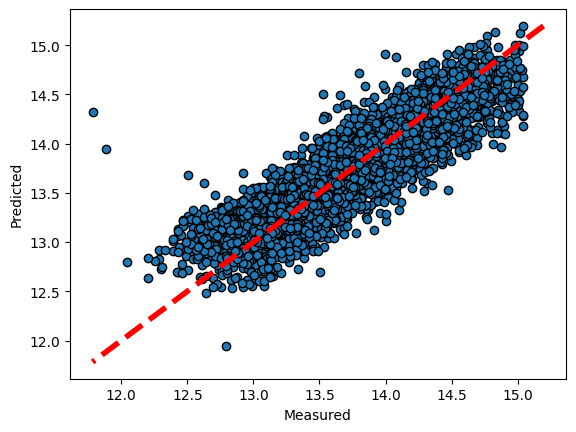

In [423]:
predicted_lr = cross_val_predict(LinearRegression(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_lr), max(target_fs2))
p2 = min(min(predicted_lr), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_lr, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/4126028525.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


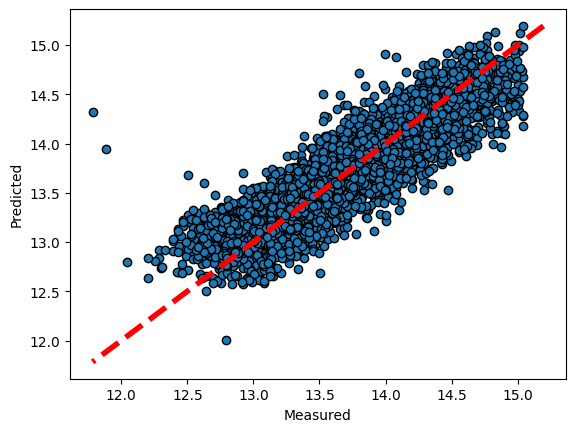

In [440]:
predicted_ridge = cross_val_predict(Ridge(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_ridge), max(target_fs2))
p2 = min(min(predicted_ridge), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_ridge, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/618773574.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


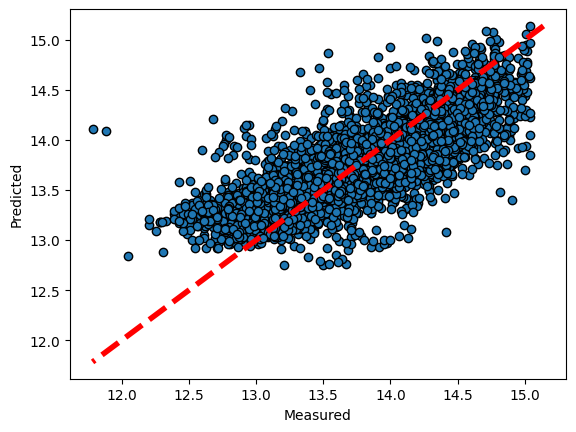

In [441]:
predicted_lasso = cross_val_predict(Lasso(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_lasso), max(target_fs2))
p2 = min(min(predicted_lasso), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_lasso, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/1215518750.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


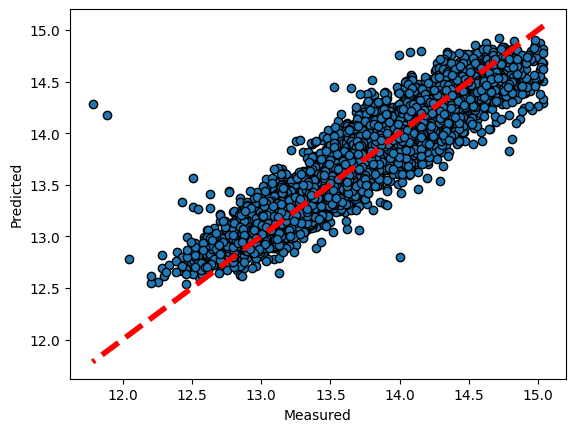

In [442]:
predicted_gbr = cross_val_predict(GradientBoostingRegressor(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_gbr), max(target_fs2))
p2 = min(min(predicted_gbr), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_gbr, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/1842960238.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


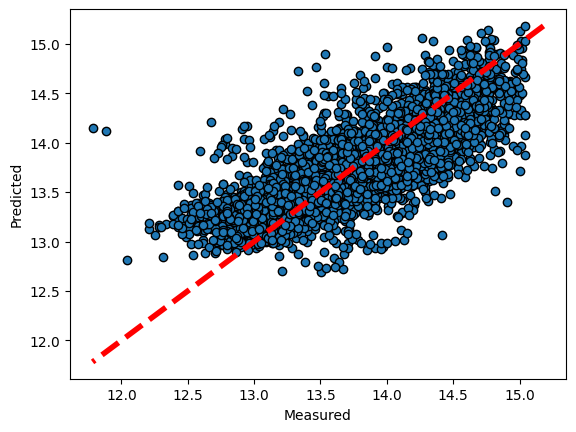

In [444]:
predicted_enet = cross_val_predict(ElasticNet(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_enet), max(target_fs2))
p2 = min(min(predicted_enet), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_enet, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/1105446906.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


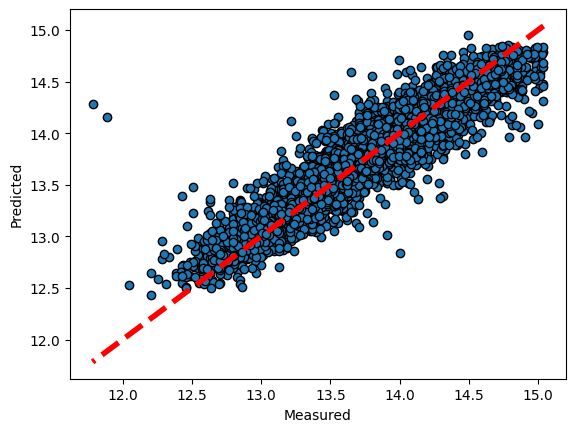

In [445]:
predicted_rfr = cross_val_predict(RandomForestRegressor(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_rfr), max(target_fs2))
p2 = min(min(predicted_rfr), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_rfr, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/12850719.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


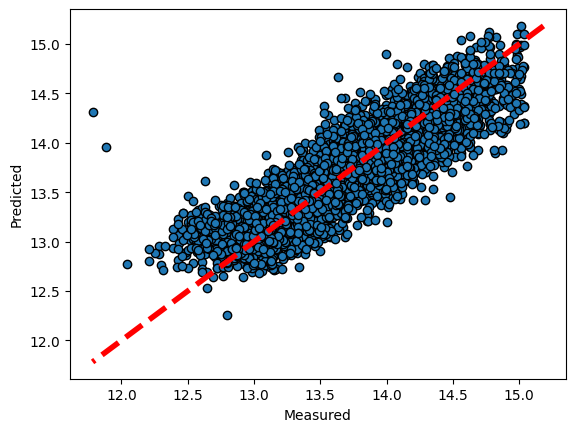

In [447]:
predicted_pls = cross_val_predict(PLSRegression(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_pls), max(target_fs2))
p2 = min(min(predicted_pls), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_pls, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/3326110137.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


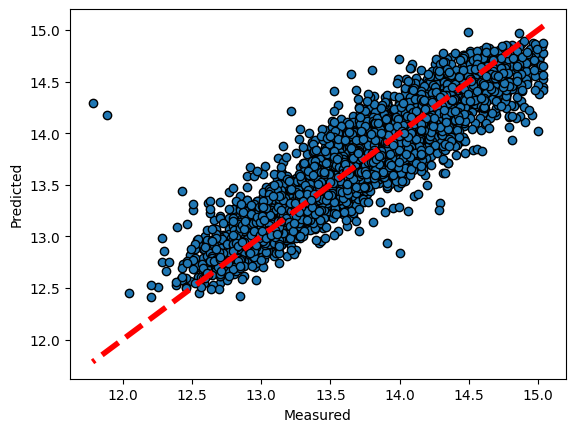

In [448]:
predicted_bag = cross_val_predict(BaggingRegressor(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_bag), max(target_fs2))
p2 = min(min(predicted_bag), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_bag, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/563467956.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


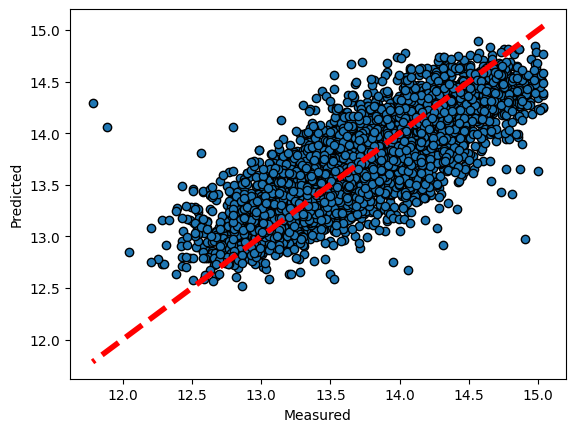

In [449]:
predicted_knn = cross_val_predict(KNeighborsRegressor(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_knn), max(target_fs2))
p2 = min(min(predicted_knn), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_knn, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/var/folders/d9/6wl161rj2wn6nhd_fn7sclm80000gn/T/ipykernel_21507/890558956.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')


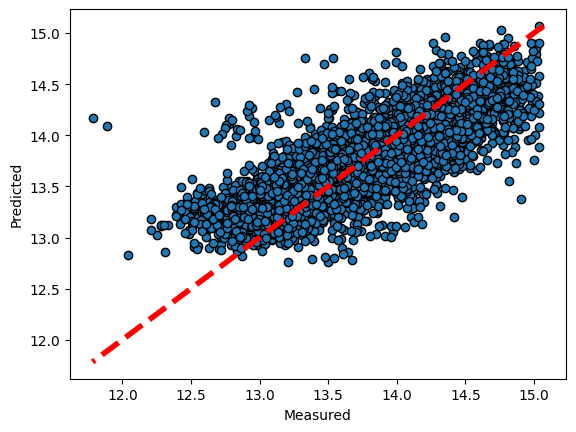

In [450]:
predicted_svr = cross_val_predict(SVR(), features_fs2, target_fs2, cv=10)

p1 = max(max(predicted_svr), max(target_fs2))
p2 = min(min(predicted_svr), min(target_fs2))

fig, ax = plt.subplots()
ax.scatter(target_fs2, predicted_svr, edgecolors=(0,0,0))

ax.plot([p1,p2],[p1,p2], 'k--', lw=4, color = 'red')




# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()